# Project for Pacmann Probability Course

## 0. Setup

### 0.1 Import Libs

In [1]:
import matplotlib
import pandas as pd
import numpy as np
# import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
# import matplotlib.font_manager as font_manager
from matplotlib import rcParams
%matplotlib inline
import seaborn as sns
from math import factorial, sqrt
from functuser import *
from numerize.numerize import numerize
import scipy.stats as stats

# customise matplotlib chart
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['axes.titleweight'] = 'bold'
rcParams['axes.titlesize'] = 20 # title
rcParams['axes.labelsize'] = 14 # label
rcParams['figure.titleweight'] = 'bold' #suptitle
rcParams['figure.titlesize'] = 20 
rcParams['axes.titlepad'] = 12 # title padding to figure 
# ticks size must be set manually 

### 0.2 Import Font & Set Styles for Graphs

In [2]:
# import ROBOTO
load_roboto_var()

# set style
seaborn = 'seaborn-white'
mpl = 'fivethirtyeight'

# color palette
male_cat = '#a2d2ff'
female_cat = '#ffc8dd'
hist_sn = '#bde0fe'
dist_sn = '#e63946' 
bmiL25_cat ='#8ac926'
bmiM25_cat = '#ff595e'
smoker_cat = '#6930c3'
nosmoker_cat = '#72efdd'
density_red = '#e63946'
distribution_blue = '#bde0fe'
underweight_cat = '#1982c4'
healthy_weight_cat = '#8ac926'
overweight_cat = '#ffca3a'
obesity_cat = '#ff595e'
# Make every designited BMI color

# dictionary palette
sex_pal = {"female": female_cat, "male": male_cat}
smoker_pal = {"yes": smoker_cat, "no": nosmoker_cat}
region_pal = {
    'northeast': '#4ecdc4',
    'northwest': '#f7fff7', 
    'southeast': '#ff6b6b', 
    'southwest': '#ffe66d'}
bmi_pal = {
    'underweight': underweight_cat,
    'healthy weight': healthy_weight_cat,
    'overweight': overweight_cat,
    'obesity': obesity_cat,
    }

# Highlight
minMax = 'coolwarm'
corrMatrix = 'RdBu'

### 0.3 Import Data

In [3]:
data = pd.read_csv('./data/insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<hr style="color: #f00; height: 1px;">
<hr style="color: #f00; height: 1px; margin-top: 1px;">

## Check Outliers: bmi & charges columns

### bmi outliers

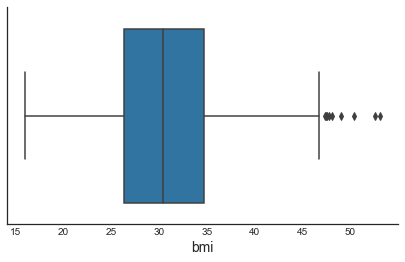

In [4]:
with plt.style.context(seaborn):
    fig, ax = plt.subplots(figsize=(7, 4))

    sns.boxplot(
        ax=ax,
        data=data,
        x='bmi')

    plt.show();

In [5]:
ddf = df_without_outlier(data, 'bmi')
ddf

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [6]:
insurance_data = ddf.copy()

insurance_data = get_bmi_status(insurance_data)
insurance_data

,age,sex,bmi,children,smoker,region,charges,bmi_status
0,19,female,27.900,0,yes,southwest,16884.92400,overweight
1,18,male,33.770,1,no,southeast,1725.55230,obesity
2,28,male,33.000,3,no,southeast,4449.46200,obesity
3,33,male,22.705,0,no,northwest,21984.47061,healthy weight
4,32,male,28.880,0,no,northwest,3866.85520,overweight
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,obesity
1334,18,female,31.920,0,no,northeast,2205.98080,obesity
1335,18,female,36.850,0,no,southeast,1629.83350,obesity
1336,21,female,25.800,0,no,southwest,2007.94500,overweight


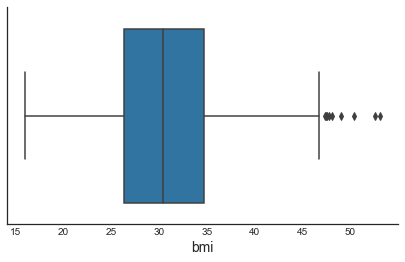

In [7]:
with plt.style.context(seaborn):
    fig, ax = plt.subplots(figsize=(7, 4))

    sns.boxplot(
        ax=ax,
        data=data,
        x='bmi')

    plt.show();

<hr style="color: #f00; height: 1px;">
<hr style="color: #f00; height: 1px; margin-top: 1px;">

## 1. Descriptive Statistics Analysis

### 1.1 Age

In [8]:
# Mean
age_mean = insurance_data['age'].mean()
print_format(age_mean, 2)

39.20


#### 1.1.1 Age Distribution

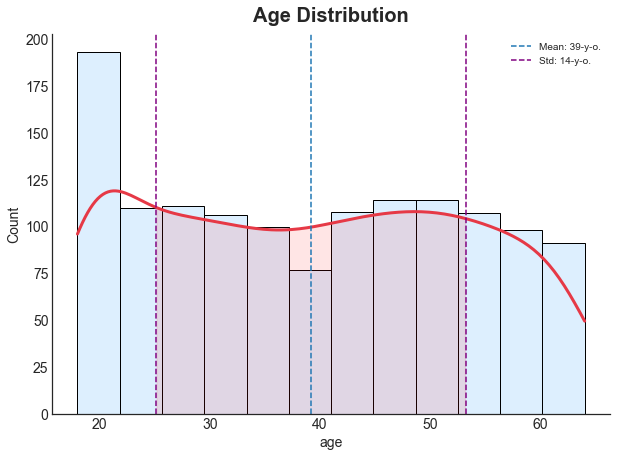

In [9]:
with plt.style.context(seaborn):
    fig, ax = plt.subplots(figsize=(10, 7))
    
    sns.histplot(
        ax=ax, 
        data=insurance_data, 
        x='age', 
        color=distribution_blue, 
        edgecolor='black', 
        kde=True,
        line_kws={'linewidth': 3, 'linestyle':'-'})

    ax.lines[0].set_color(density_red)
    ax.xaxis.set_tick_params(labelsize=14)
    ax.yaxis.set_tick_params(labelsize=14)
    
    ax.axvline(x=insurance_data['age'].mean(), linestyle='--', label=f'Mean: {insurance_data.age.mean():.0f}-y-o.')
    ax.axvline(
        x=insurance_data['age'].mean()+insurance_data['age'].std(), 
        linestyle='--', 
        label=f'Std: {insurance_data.age.std():.0f}-y-o.',
        color='purple')
    ax.axvline(
        x=insurance_data['age'].mean()-insurance_data['age'].std(), 
        linestyle='--',
        color='purple')

    kde_x, kde_y = ax.lines[0].get_data() # for fill_between

    ax.fill_between(
        kde_x, 
        kde_y, 
        where=(
            kde_x>insurance_data.age.mean() - insurance_data.age.std()) & (kde_x<insurance_data.age.mean() + insurance_data.age.std()
            ), 
        color='red', 
        alpha=0.1)
    ax.set_title("Age Distribution", fontsize=20, fontweight="bold")
    ax.legend()

    plt.show();

In [97]:
min_age = insurance_data['age'].min()
max_age = insurance_data['age'].max()

print(f'Min: {min_age}')
print(f'Max: {max_age}')

Min: 18
Max: 64


In [99]:
insurance_data['age'].value_counts().head()

19    68
18    68
50    29
51    29
45    29
Name: age, dtype: int64

Age 18 and 19 with 68 people dominates. This can mean 2 thing:
1. this domination of young people is because of early investment on health risks for the future by the parents; or
2. elderly (>60 y.o.) do not invest on health insurance and may have other priorities or do not know about the benefits of it.

We need to why elderly do not sign up as many as the younger groups. This is important because older people tend to have higher chances of having health issues. As they reach retirement age, it is important that they have health insurance to prevent future health financial risks.

<hr>

### 1.2 Sex

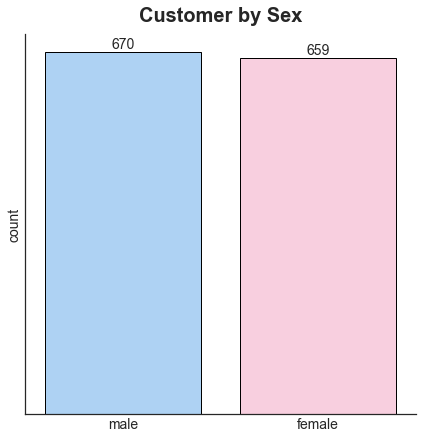

In [10]:
sex_counts = insurance_data['sex'].value_counts().rename_axis('sex').reset_index(name='count')

with plt.style.context(seaborn):
    fig, ax = plt.subplots(figsize=(7, 7))
    barset = {'edgecolor':'black', 'linewidth':1}

    sns.barplot(
        ax=ax,
        data=sex_counts,
        x='sex',
        y='count',
        palette=sex_pal,
        **barset)
   
    ax.set_title('Customer by Sex', fontweight='bold')
    ax.set(xlabel=None)
    ax.xaxis.set_tick_params(labelsize=14)
    ax.yaxis.set_major_locator(plt.NullLocator()) # Remove Y-Axis Ticks

    ax.bar_label(ax.containers[0], fontsize=14, fmt='%d')

    plt.show();

#### 1.2.1 Sex Distribution by Age

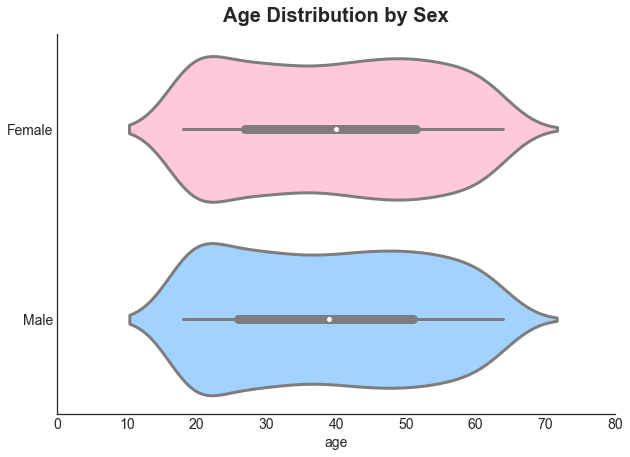

In [11]:
with plt.style.context(seaborn):
    fig, ax = plt.subplots(figsize=(10, 7))

    sns.violinplot(
        ax=ax, 
        x='age', 
        y='sex', 
        data=insurance_data, 
        palette=sex_pal, 
        saturation=1, 
        linewidth=3)
        
    ax.set_title('Age Distribution by Sex', size=20, weight="bold")
    ax.set_yticklabels(['Female', 'Male'])
    ax.xaxis.set_tick_params(labelsize=14)
    ax.yaxis.set_tick_params(labelsize=14)
    
    ax.set_xlim(0, 80)
    ax.set(ylabel=None)
    plt.show();

In [12]:
get_male = insurance_data.loc[insurance_data['sex'] == 'male']
get_female = insurance_data.loc[insurance_data['sex'] == 'female']

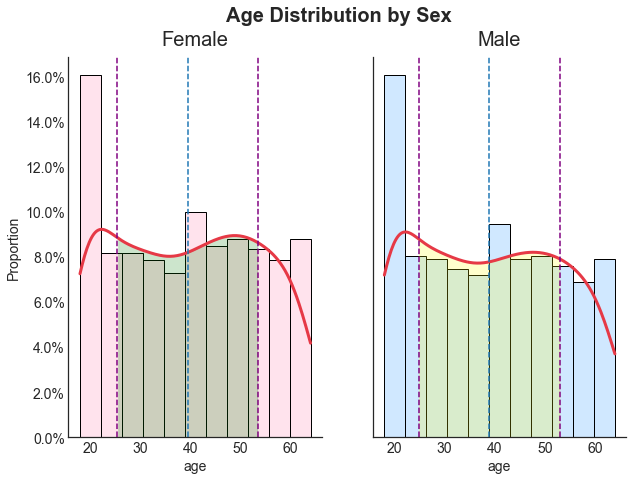

In [13]:
with plt.style.context(seaborn):
    rcParams['axes.titleweight'] = 'normal'
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 7))
    
    sns.histplot(
        ax=ax1, 
        data=get_female, 
        x='age', 
        color=female_cat, 
        edgecolor='black', 
        kde=True,
        line_kws={'linewidth': 3, 'linestyle':'-'},
        stat='proportion')
    sns.histplot(
        ax=ax2, 
        data=get_male, 
        x='age', 
        color=male_cat, 
        edgecolor='black', 
        kde=True,
        line_kws={'linewidth': 3, 'linestyle':'-'},
        stat='proportion')

    ax1.axvline(x=get_female['age'].mean(), linestyle='--', label=f'Mean: {get_female.age.mean():.0f}-y-o.')
    ax1.axvline(
        x=get_female['age'].mean()+get_female['age'].std(), 
        linestyle='--', 
        label=f'Std: {get_female.age.std():.0f}-y-o.',
        color='purple')
    ax1.axvline(
        x=get_female['age'].mean()-get_female['age'].std(), 
        linestyle='--',
        color='purple')

    kde_x, kde_y = ax1.lines[0].get_data() # for fill_between

    ax1.fill_between(
        kde_x, 
        kde_y, 
        where=(
            kde_x>get_female.age.mean() - get_female.age.std()) & (kde_x<get_female.age.mean() + get_female.age.std()
            ), 
        color='green', 
        alpha=0.2)

    ax2.axvline(x=get_male['age'].mean(), linestyle='--', label=f'Mean: {get_male.age.mean():.0f}-y-o.')
    ax2.axvline(
        x=get_male['age'].mean()+get_male['age'].std(), 
        linestyle='--', 
        label=f'Std: {get_male.age.std():.0f}-y-o.',
        color='purple')
    ax2.axvline(
        x=get_male['age'].mean()-get_male['age'].std(), 
        linestyle='--',
        color='purple')

    kde_x, kde_y = ax2.lines[0].get_data() # for fill_between

    ax2.fill_between(
        kde_x, 
        kde_y, 
        where=(
            kde_x>get_male.age.mean() - get_male.age.std()) & (kde_x<get_male.age.mean() + get_male.age.std()
            ), 
        color='yellow', 
        alpha=0.2)

    plt.suptitle('Age Distribution by Sex')

    ax2.set_title('Male')
    ax2.set(ylabel=None)
    ax2.xaxis.set_tick_params(labelsize=14)
    ax2.yaxis.set_major_locator(plt.NullLocator()) # Remove Y-Axis Ticks

    ax1.set_title('Female')
    ax1.yaxis.set_major_formatter(ticker.PercentFormatter(1))
    ax1.xaxis.set_tick_params(labelsize=14)
    ax1.yaxis.set_tick_params(labelsize=14)

    ax1.lines[0].set_color(density_red)
    ax2.lines[0].set_color(density_red)

    tick_spacing = 0.02
    ax1.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

    plt.show();

In [14]:
print(f'Male, mean: {get_male.age.mean():.2f}')
print(f'Male, std: {get_male.age.std():.2f}')
print(f'Female, mean: {get_female.age.mean():.2f}')
print(f'Female, std: {get_female.age.std():.2f}')

Male, mean: 38.94
Male, std: 14.03
Female, mean: 39.47
Female, std: 14.07


Distribution of age on sex does not differ significantly.

<hr>

### 1.3 Smoker and Non-Smoker

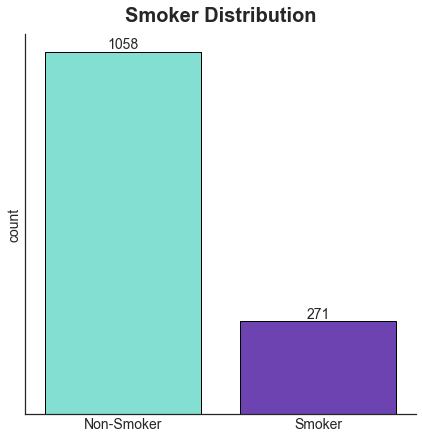

In [15]:
sex_counts = insurance_data['smoker'].value_counts().rename_axis('smoker').reset_index(name='count')
smoker_labels = ['Non-Smoker', 'Smoker']

with plt.style.context(seaborn):
    fig, ax = plt.subplots(figsize=(7, 7))

    sns.barplot(
        ax=ax,
        data=sex_counts,
        x='smoker',
        y='count',
        palette=smoker_pal,
        **barset)
    ax.set_xticklabels(smoker_labels)
    ax.set_title('Smoker Distribution', fontweight='bold')
    ax.set(xlabel=None)
    ax.xaxis.set_tick_params(labelsize=14)
    ax.yaxis.set_major_locator(plt.NullLocator()) # Remove Y-Axis Ticks

    ax.bar_label(ax.containers[0], fontsize=14, fmt='%d')

    plt.show();

#### 1.3.1 Smoker Status Age by Sex

In [16]:
smoker = insurance_data.loc[insurance_data['smoker'] == 'yes']
no_smoker = insurance_data.loc[insurance_data['smoker'] == 'no']

male_smoker = smoker[smoker['sex'] == 'male']  
female_smoker = smoker[smoker['sex'] == 'female']
  
male_nosmoker = no_smoker[no_smoker['sex'] == 'male']  
female_nosmoker = no_smoker[no_smoker['sex'] == 'female']


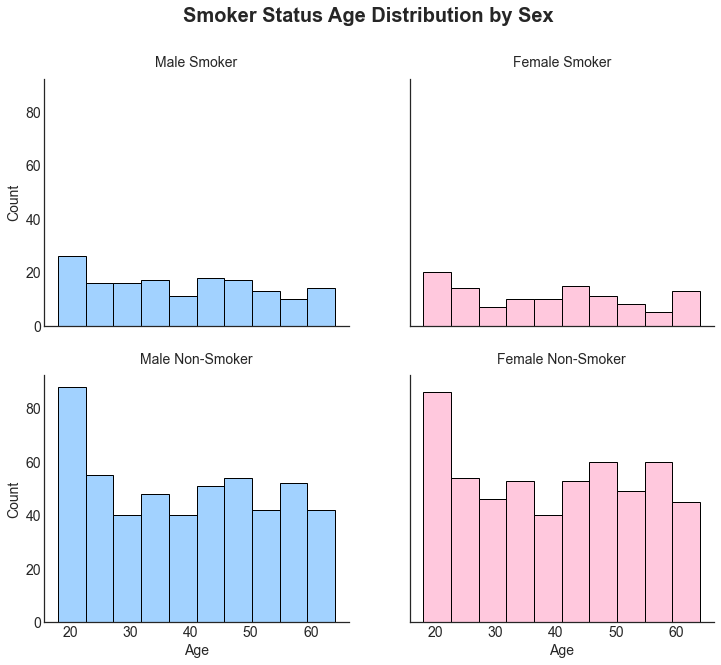

In [17]:
with plt.style.context(seaborn): # set temporary style
    rcParams['axes.titleweight'] = 'normal'
    rcParams['axes.titlesize'] = 14

    fig, ([ax1, ax2], [ax3, ax4]) = plt.subplots(2, 2, figsize=(12, 10), sharey=True, sharex=True)

    ax1.hist(
        male_smoker['age'], 
        edgecolor='black', 
        color=male_cat)
    ax2.hist(
        female_smoker['age'], 
        edgecolor='black', 
        color=female_cat)
    ax3.hist(
        male_nosmoker['age'], 
        edgecolor='black', 
        color=male_cat)
    ax4.hist(
        female_nosmoker['age'], 
        edgecolor='black', 
        color=female_cat)

    plt.suptitle("Smoker Status Age Distribution by Sex", fontsize=20)
    ax1.set_title('Male Smoker')
    ax2.set_title('Female Smoker')
    ax3.set_title('Male Non-Smoker')
    ax4.set_title('Female Non-Smoker')

    ax1.set(xlabel='Age', ylabel='Count')
    ax1.xaxis.set_tick_params(labelsize=14)
    ax1.yaxis.set_tick_params(labelsize=14)
    
    ax2.set(xlabel='Age')
    ax2.xaxis.set_tick_params(labelsize=14)
    ax2.yaxis.set_tick_params(labelsize=14)
    
    ax3.set(xlabel='Age', ylabel='Count')
    ax3.xaxis.set_tick_params(labelsize=14)
    ax3.yaxis.set_tick_params(labelsize=14)
    
    ax4.set(xlabel='Age')
    ax4.xaxis.set_tick_params(labelsize=14)
    ax4.yaxis.set_tick_params(labelsize=14)

    ax1.set(xlabel=None)
    ax2.set(xlabel=None)

    plt.show();

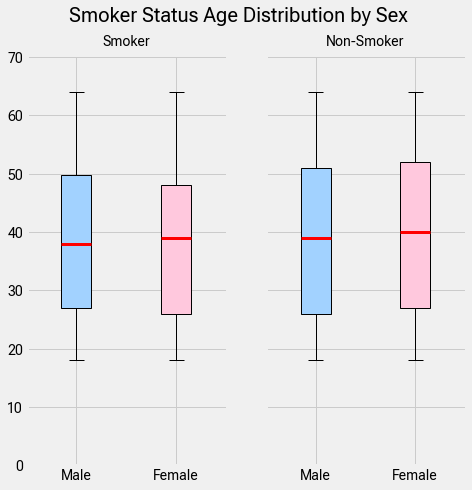

In [18]:
with plt.style.context(mpl):
    labels = ['Male', 'Female']  
    data1 = [male_smoker['age'], female_smoker['age']]
    data2 = [male_nosmoker['age'], female_nosmoker['age']]
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 7), sharey=True)

    bp = ax1.boxplot(
        data1, 
        vert=True, 
        patch_artist=True, 
        widths = 0.3)
    bp1 = ax2.boxplot(
        data2, 
        vert=True, 
        patch_artist=True, 
        widths = 0.3)

    plt.suptitle('Smoker Status Age Distribution by Sex')
    ax1.set_xticklabels(['Male', 'Female']) 
    ax1.set_ylim(0, 70)
    ax1.set_title('Smoker', fontsize=14)
    
    ax2.set_title('Non-Smoker', fontsize=14)
    ax2.set_xticklabels(['Male', 'Female']) 
    # set box colours
    colors = [male_cat, female_cat] 
    for patch, color in zip(bp['boxes'], colors): patch.set_facecolor(color) 
    for patch, color in zip(bp1['boxes'], colors): patch.set_facecolor(color) 
    
    # changing colours and linewidth of medians 
    for median in bp['medians']: median.set(color ='red', linewidth = 3) 
    for median in bp1['medians']: median.set(color ='red', linewidth = 3) 


Distribution based on smoking status does not differ significantly. But Non-Smokers are clearly dominates.

<hr>

### 1.4 BMI

#### 1.4.1 BMI Distribution

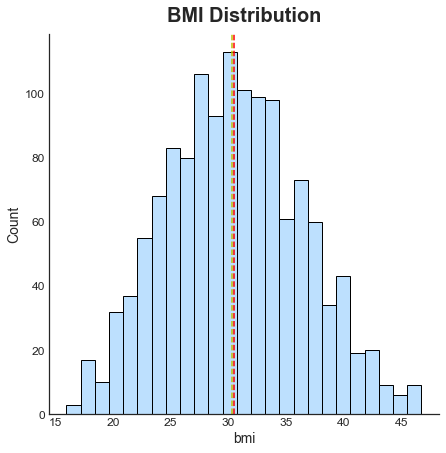

In [19]:
with plt.style.context(seaborn):
    fig, ax = plt.subplots(figsize=(7, 7))
    sns.histplot(
        ax=ax,
        data=insurance_data,
        x='bmi',
        edgecolor='black',
        facecolor=distribution_blue,
        bins=25
        )

    ax.axvline(insurance_data.bmi.mean(), color='r',linestyle='--')
    ax.axvline(insurance_data.bmi.median(), color='y',linestyle='--')
    
    ax.set_title("BMI Distribution", fontsize=20)
    ax.xaxis.set_tick_params(labelsize=12)
    ax.yaxis.set_tick_params(labelsize=12)

    plt.show();

#### 1.4.2 Smoker BMI Mean & Median & Mode 

In [20]:
smokerBMI_mean = (
    insurance_data
    .groupby(['smoker'])
    .mean()
    ['bmi'] #
    )[1] # 1 = yes, 0 = not

smokerBMI_median = (
    insurance_data
    .groupby(['smoker'])
    .median()
    ['bmi'] #
    )[1] # 1 = yes, 0 = not

smokerBMI_mode = ((
    insurance_data.loc[insurance_data['smoker'] == 'yes']
    )['bmi']
    ).agg(pd.Series.mode)[0]

#### 1.4.3 Non-smoker BMI Mean & Median & Mode

In [21]:
no_smokerBMI_mean = (
    insurance_data
    .groupby(['smoker'])
    .mean()
    ['bmi'] #
    )[0] # 1 = yes, 0 = not

no_smokerBMI_median = (
    insurance_data
    .groupby(['smoker'])
    .median()
    ['bmi'] #
    )[0] # 1 = yes, 0 = not

no_smokerBMI_mode = ((
    insurance_data.loc[insurance_data['smoker'] == 'no']
    )['bmi']
    ).agg(pd.Series.mode)[0]

In [22]:
bmi_stats = pd.DataFrame(
    {
    'Mean': [smokerBMI_mean, no_smokerBMI_mean],
    'Median': [smokerBMI_median, no_smokerBMI_mean],
    'Mode': [smokerBMI_mode, no_smokerBMI_mode],
    }, index=['Smoker', 'Non-Smoker'])

bmi_stats = bmi_stats\
    .style\
        .background_gradient(cmap=minMax)\
        .set_properties(**{'font-size': '20px'})

bmi_stats

,Mean,Median,Mode
Smoker,30.503782,30.360000,28.310000
Non-Smoker,30.545945,30.545945,32.300000


BMI of Non-Smokers are slightly higher?

#### 1.4.4 Smoker Status by BMI

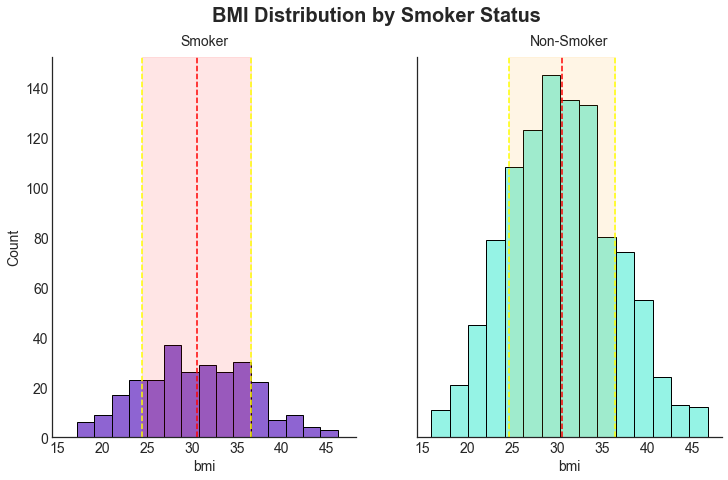

In [111]:
with plt.style.context(seaborn):
    rcParams['axes.titleweight'] = 'normal'
    rcParams['axes.titlesize'] = 14

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 7), sharex=True, sharey=True)

    sns.histplot(
        ax=ax1,
        data=smoker,
        x='bmi',
        color=smoker_cat,
        bins=15)
    sns.histplot(
        ax=ax2,
        data=no_smoker,
        x='bmi',
        color=nosmoker_cat,
        bins=15)
    
    ax1.axvline(x=smoker['bmi'].mean(), linestyle='--', label=f'Mean: {smoker.bmi.mean():.0f}-y-o.', color='red')
    ax1.axvline(
        x=smoker['bmi'].mean()+smoker['bmi'].std(), 
        linestyle='--', 
        label=f'Std: {smoker.bmi.std():.0f}-y-o.',
        color='yellow')
    ax1.axvline(
        x=smoker['bmi'].mean()-smoker['bmi'].std(), 
        linestyle='--',
        color='yellow')

    ax1.axvspan(smoker.bmi.mean()-smoker.bmi.std(), smoker.bmi.mean()+smoker.bmi.std(), alpha=0.1, color='red')

    ax2.axvline(x=no_smoker['bmi'].mean(), linestyle='--', label=f'Mean: {no_smoker.bmi.mean():.0f}-y-o.', color='red')
    ax2.axvline(
        x=no_smoker['bmi'].mean()+no_smoker['bmi'].std(), 
        linestyle='--', 
        label=f'Std: {no_smoker.bmi.std():.0f}-y-o.',
        color='yellow')
    ax2.axvline(
        x=no_smoker['bmi'].mean()-no_smoker['bmi'].std(), 
        linestyle='--',
        color='yellow')

    ax2.axvspan(no_smoker.bmi.mean()-no_smoker.bmi.std(), no_smoker.bmi.mean()+no_smoker.bmi.std(), alpha=0.1, color='orange')

    plt.suptitle('BMI Distribution by Smoker Status')

    ax2.set_title('Non-Smoker')
    ax2.set(ylabel=None)
    ax2.xaxis.set_tick_params(labelsize=14)
 # Remove Y-Axis Ticks

    ax1.set_title('Smoker')
    ax1.xaxis.set_tick_params(labelsize=14)
    ax1.yaxis.set_tick_params(labelsize=14)

    plt.show();

In [ ]:
bmi_smoker = insurance_data[insurance_data['smoker'] == 'yes']  
bmi_no_smoker = insurance_data[insurance_data['smoker'] == 'no']

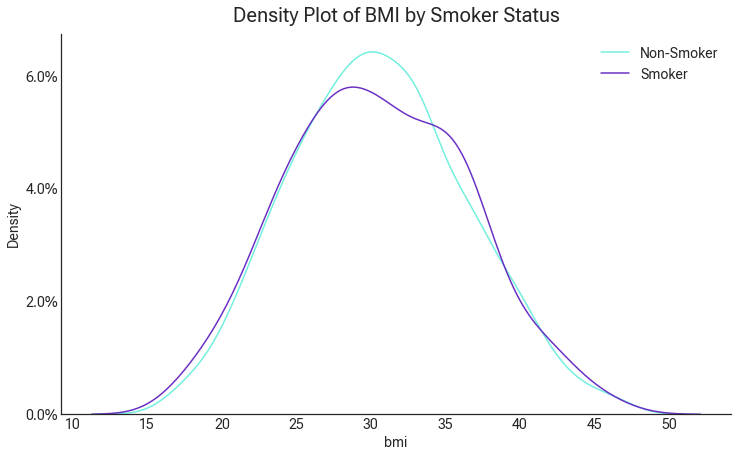

In [ ]:
with plt.style.context(seaborn):
    fig, ax = plt.subplots(figsize=(12, 7))

    sns.kdeplot(
        ax=ax, 
        data=bmi_no_smoker, 
        x='bmi', 
        color=nosmoker_cat, 
        label='Non-Smoker')
    sns.kdeplot(
        ax=ax, 
        data=bmi_smoker, 
        x='bmi', 
        color=smoker_cat, 
        label='Smoker')

    ax.set_title('Density Plot of BMI by Smoker Status', fontsize=20)
    ax.yaxis.set_major_formatter(ticker.PercentFormatter(1))
    ax.xaxis.set_tick_params(labelsize=14)
    ax.yaxis.set_tick_params(labelsize=14)
    
    # Hide 0 on y-axis
    ax.yaxis.get_major_ticks()[0].label1.set_visible(False)

    tick_spacing = 0.02
    ax.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    ax.legend(fontsize=14)


Non-Smoker's BMI is indeed slighly higher. But does that important? Does that affect charges? Let's see.

#### 1.4.5 Comparing BMI by Sex

In [24]:
male1 = insurance_data.loc[insurance_data['sex'] == 'male']
female1 = insurance_data.loc[insurance_data['sex'] == 'female']

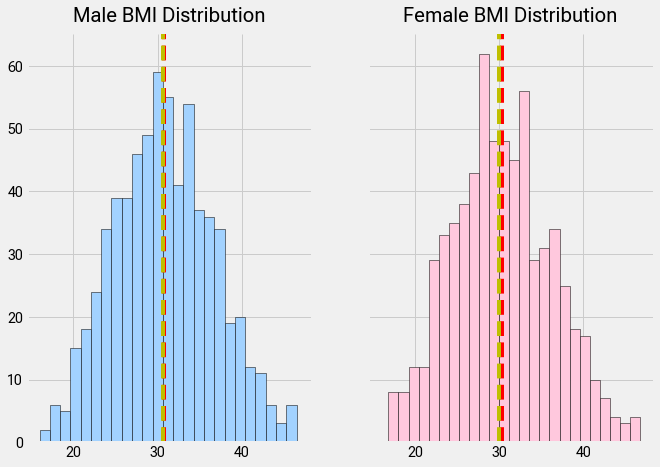

In [25]:
with plt.style.context(mpl):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 7), sharex=True, sharey=True)
    
    ax1.hist(
        male1['bmi'], 
        edgecolor='black',
        color=male_cat,
        bins=25)
        
    ax1.axvline(male1['bmi'].mean(), c='r', linestyle='--', label='BMI of Male Mean')
    ax1.axvline(male1['bmi'].median(), c='y', linestyle='--', label='BMI of Male Median')

    ax2.hist(
        female1['bmi'], 
        edgecolor='black',
        color=female_cat,
        bins=25)
    
    ax2.axvline(female1['bmi'].mean(), c='r', linestyle='--', label='BMI of Female Mean')
    ax2.axvline(female1['bmi'].median(), c='y', linestyle='--', label='BMI of Female Median')

    ax1.set(title='Male BMI Distribution')
    ax2.set(title='Female BMI Distribution')

    plt.show();

Male and Female BMIs are relatively the same.

<hr>

### 1.5 Charges

#### 1.5.1 Variance of Charges

In [28]:
# smoker
smoker_charges_var = (
    insurance_data
    .loc[insurance_data['smoker'] == 'yes']
    ['charges']
    .var()
    )
    
# non-smoker
non_smoker_charges_var = (
    insurance_data
    .loc[insurance_data['smoker'] == 'no']
    ['charges']
    .var()
)

In [29]:
charges_variance_stats = pd.DataFrame(
    {
    'Variance': [numerize(smoker_charges_var), numerize(non_smoker_charges_var)],
    'Standard Deviation': [numerize(sqrt(smoker_charges_var)), numerize(sqrt(non_smoker_charges_var))]
    }, index=['Smoker', 'Non-Smoker'])

charges_variance_stats

,Variance,Standard Deviation
Smoker,129.61M,11.38K
Non-Smoker,36.03M,6K


Smoker charges is more spread out.

#### 1.5.2 Charges by Sex, Smoker, and Age 

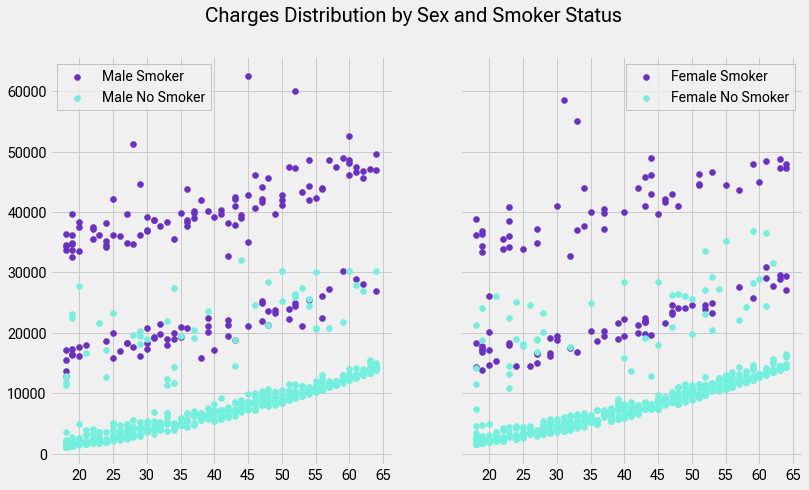

In [30]:
# male and female smoker are already present
# get non smokers category by sex
male_no_smoker = insurance_data.loc[
    (insurance_data['smoker'] == 'no')
    &
    (insurance_data['sex'] == 'male')]

female_no_smoker = insurance_data.loc[
    (insurance_data['smoker'] == 'no')
    &
    (insurance_data['sex'] == 'female')]

with plt.style.context(mpl):  
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 7), sharey=True,sharex=True)

    ax1.scatter(
        male_smoker['age'], 
        male_smoker['charges'], 
        c=smoker_cat, 
        label='Male Smoker')
    ax2.scatter(
        female_smoker['age'], 
        female_smoker['charges'], 
        c=smoker_cat, 
        label='Female Smoker')
    ax1.scatter(
        male_no_smoker['age'], 
        male_no_smoker['charges'], 
        c=nosmoker_cat, 
        label='Male No Smoker')
    ax2.scatter(
        female_no_smoker['age'], 
        female_no_smoker['charges'], 
        c=nosmoker_cat, 
        label='Female No Smoker')

    ax1.legend(fontsize='medium', edgecolor='gray', fancybox=False)
    ax2.legend(fontsize='medium', edgecolor='gray', fancybox=False)

    plt.suptitle("Charges Distribution by Sex and Smoker Status")

    tick_spacing = 5
    ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    ax2.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

    plt.show();

Male charges' are slighly higher than the female one. Smokers pay significantly more than Non-Smokers.

#### 1.5.3 Charges by BMI and Sex for BMI > 25

In [31]:
male_smoker_bmi25 = male_smoker.loc[male_smoker['bmi'] > 25]
male_no_smoker_bmi25 = male_no_smoker.loc[male_no_smoker['bmi'] > 25]
female_no_smoker_bmi25 = female_no_smoker.loc[female_no_smoker['bmi'] > 25]
female_smoker_bmi25 = female_no_smoker.loc[female_no_smoker['bmi'] > 25]

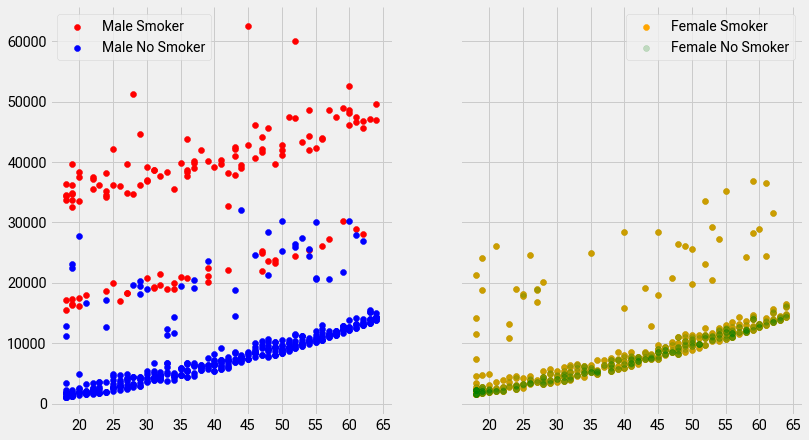

In [32]:
with plt.style.context(mpl): 
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 7), sharey=True,sharex=True)

    ax1.scatter(
        male_smoker_bmi25['age'],
         male_smoker_bmi25['charges'], 
         c='red', 
         label='Male Smoker')
    ax2.scatter(
        female_smoker_bmi25['age'], 
        female_smoker_bmi25['charges'], 
        c='orange', 
        label='Female Smoker')
    ax1.scatter(
        male_no_smoker_bmi25['age'], 
        male_no_smoker_bmi25['charges'], 
        c='blue', 
        label='Male No Smoker')
    ax2.scatter(
        female_no_smoker_bmi25['age'], 
        female_no_smoker_bmi25['charges'], 
        c='green', 
        label='Female No Smoker', 
        alpha=0.2)

    tick_spacing = 5

    ax1.legend()
    ax2.legend()

    ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    ax2.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

    plt.show();

#### 1.5.4 Charges by BMI and Sex for BMI < 25

In [33]:
male_smoker_lbmi25 = male_smoker.loc[male_smoker['bmi'] < 25]
male_no_smoker_lbmi25 = male_no_smoker.loc[male_no_smoker['bmi'] < 25]
female_no_smoker_lbmi25 = female_no_smoker.loc[female_no_smoker['bmi'] < 25]
female_smoker_lbmi25 = female_no_smoker.loc[female_no_smoker['bmi'] < 25]

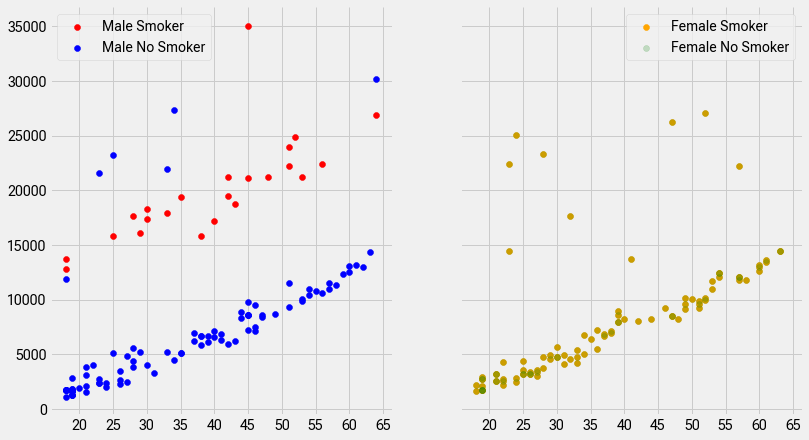

In [34]:
with plt.style.context(mpl):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 7), sharey=True,sharex=True)

    ax1.scatter(
        male_smoker_lbmi25['age'], 
        male_smoker_lbmi25['charges'], 
        c='red', 
        label='Male Smoker')
    ax2.scatter(
        female_smoker_lbmi25['age'], 
        female_smoker_lbmi25['charges'], 
        c='orange', 
        label='Female Smoker')
    ax1.scatter(
        male_no_smoker_lbmi25['age'], 
        male_no_smoker_lbmi25['charges'], 
        c='blue', 
        label='Male No Smoker')
    ax2.scatter(
        female_no_smoker_lbmi25['age'], 
        female_no_smoker_lbmi25['charges'], 
        c='green', 
        label='Female No Smoker', 
        alpha=0.2)

    tick_spacing = 5

    ax1.legend()
    ax2.legend()

    ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    ax2.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

    plt.show();

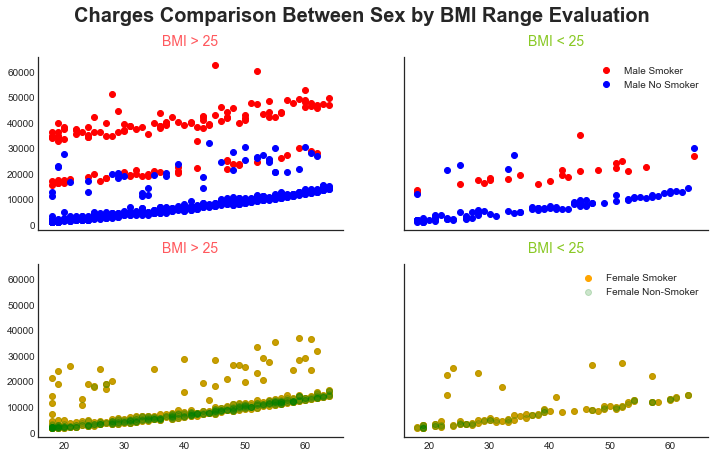

In [35]:
with plt.style.context(seaborn):
    rcParams['axes.titleweight'] = 'normal'
    rcParams['axes.titlesize'] = 14
    
    fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(nrows=2, ncols=2,  figsize=(12, 7), sharey=True,sharex=True)

    ax1.scatter(
        male_smoker_bmi25['age'], 
        male_smoker_bmi25['charges'], 
        c='red', 
        label='Male Smoker')
    ax1.scatter(
        male_no_smoker_bmi25['age'], 
        male_no_smoker_bmi25['charges'], 
        c='blue', 
        label='Male No Smoker')
    ax2.scatter(
        male_smoker_lbmi25['age'], 
        male_smoker_lbmi25['charges'], 
        c='red', 
        label='Male Smoker')
    ax2.scatter(
        male_no_smoker_lbmi25['age'], 
        male_no_smoker_lbmi25['charges'], 
        c='blue', 
        label='Male No Smoker')
    ax3.scatter(
        female_smoker_bmi25['age'], 
        female_smoker_bmi25['charges'], 
        c='orange', 
        label='Female Smoker')
    ax3.scatter(
        female_no_smoker_bmi25['age'], 
        female_no_smoker_bmi25['charges'], 
        c='green', 
        label='Female No Smoker', 
        alpha=0.2)
    ax4.scatter(
        female_smoker_lbmi25['age'], 
        female_smoker_lbmi25['charges'], 
        c='orange', 
        label='Female Smoker')
    ax4.scatter(
        female_no_smoker_lbmi25['age'], 
        female_no_smoker_lbmi25['charges'], 
        c='green', 
        label='Female Non-Smoker', 
        alpha=0.2)
    
    plt.suptitle('Charges Comparison Between Sex by BMI Range Evaluation')

    ax1.set_title('BMI > 25', color=bmiM25_cat)
    ax2.set_title('BMI < 25', color=bmiL25_cat)
    ax3.set_title('BMI > 25', color=bmiM25_cat)
    ax4.set_title('BMI < 25', color=bmiL25_cat)

    ax2.legend()
    ax4.legend()
    plt.show();

Those with BMI > 25 pay higher than those with BMI < 25. But again, smoking condition heavilit influences the charges.

<hr style="color: #f00; height: 1px;">
<hr style="color: #f00; height: 1px; margin-top: 1px;">

## 2. Categorical Variable Analysis (PMF)

### 2.1 Sex

#### 2.1.1 Proportion

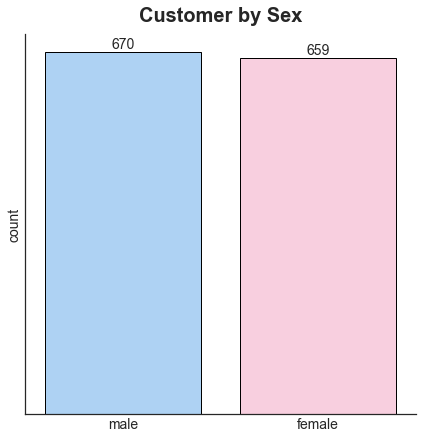

In [36]:
with plt.style.context(seaborn):
    fig, ax = plt.subplots(figsize=(7, 7))
    counts = insurance_data['sex'].value_counts().rename_axis('sex').reset_index(name='count') 

    ax = sns.barplot(
        x='sex', 
        y='count', 
        data=counts,
        palette=sex_pal,
        edgecolor='black') 
    ax.bar_label(ax.containers[0], fontsize=14, fmt='%d')

    ax.set_title('Customer by Sex')
    ax.set(xlabel=None)
    ax.xaxis.set_tick_params(labelsize=14)
    ax.yaxis.set_major_locator(plt.NullLocator())

    plt.show();

Proportion of customer's sex is around **50 : 50**. Relatively the same.

#### 2.1.2 Top Charges by Sex

In [37]:
top_charges_sex = (insurance_data.groupby(
    ['sex']
    )['charges']
    ).max()\
        .reset_index()
        
top_charges_sex

,sex,charges
0,female,58571.07448
1,male,62592.87309


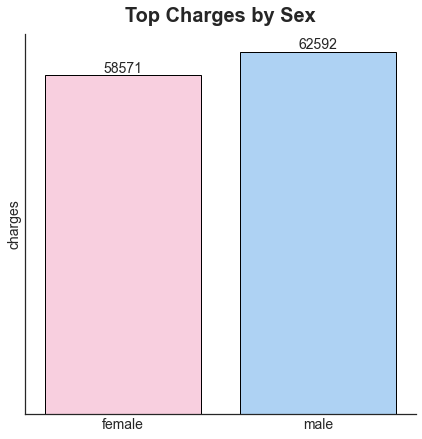

In [38]:
with plt.style.context(seaborn):
    fig, ax = plt.subplots(figsize=(7, 7))
    kwargs = {'edgecolor':'black', 'linewidth':1}
    
    sns.barplot(
        ax=ax, 
        data=top_charges_sex, 
        x='sex', 
        y='charges', 
        palette=sex_pal,
        **kwargs)
        
    ax.set_title('Top Charges by Sex')
    ax.set(xlabel=None)
    ax.xaxis.set_tick_params(labelsize=14)
    ax.yaxis.set_major_locator(plt.NullLocator()) # Remove Y-Axis Ticks
    
    ax.bar_label(ax.containers[0], fontsize=14, fmt='%d')

    plt.show();

In [113]:
62592-58571

4021

Male's max charges is $4K higher than the female's max charges.

#### 2.1.3 Smoker Status by Sex

In [39]:
yn_smoker_sex = pd.DataFrame(
    insurance_data.groupby(['sex', 'smoker'])
    .count()['charges'])

yn_smoker_sex['percentage (%)'] = ((yn_smoker_sex['charges']*100)/yn_smoker_sex['charges'].sum())

yn_smoker_sex

charges  percentage (%)
sex    smoker                         
female no          546       41.083521
       yes         113        8.502634
male   no          512       38.525207
       yes         158       11.888638

In [40]:
# prepare data for plotting
smoker_percent_list = yn_smoker_sex['percentage (%)'].to_list()
smoker_sex_list = smoker_percent_list[::2]
no_smoker_sex_list = smoker_percent_list[1::2]
sex_labels = ['Female', 'Male']

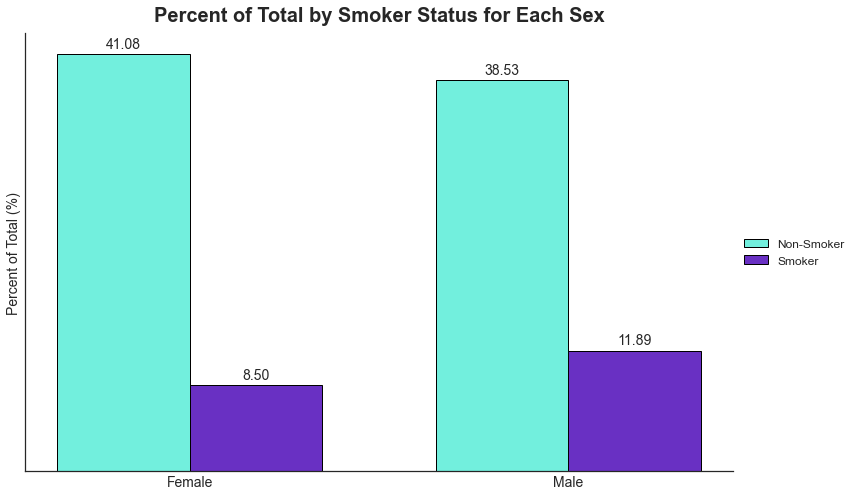

In [41]:
with plt.style.context(seaborn):
    x = np.arange(len(smoker_labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots(figsize=(12, 7))
    rects1 = ax.bar(
        x - width/2, 
        smoker_sex_list, 
        width, 
        label='Non-Smoker',
        color=nosmoker_cat,
        edgecolor='black',
        linewidth=1)
    rects2 = ax.bar(
        x + width/2, 
        no_smoker_sex_list, 
        width, 
        label='Smoker',
        color=smoker_cat,
        edgecolor='black',
        linewidth=1)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Percent of Total (%)')
    ax.set_title('Percent of Total by Smoker Status for Each Sex', fontsize=20)
    ax.set_xticks(x, sex_labels)
    ax.yaxis.set_major_locator(plt.NullLocator()) 
    ax.xaxis.set_tick_params(labelsize=14)

    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='large', edgecolor='black')
    
    ax.bar_label(rects1, padding=3, fontsize=14, fmt='%.2f')
    ax.bar_label(rects2, padding=3, fontsize=14, fmt='%.2f')

    fig.tight_layout()

    plt.show();


Non-Smokers still dominates the proportion.

#### 2.1.4 Probability of a Smoker is a Female

In [42]:
prob_female = (insurance_data['sex'] == 'female')
prob_male = (insurance_data['sex'] == 'male')
prob_smoker = (insurance_data['smoker'] == 'yes')
prob_no_smoker = (insurance_data['smoker'] == 'no')

In [43]:
female_given_smoker = conditional(prob_female, given=prob_smoker)

print_format(female_given_smoker, 2)

0.42


#### 2.1.5 Probability of a Smoker is a Male

In [44]:
male_given_smoker = conditional(prob_male, given=prob_smoker)

print_format(male_given_smoker, 2)

0.58


Smoker is more likely to be a male than a female.

<hr>

## 2.2 Region

#### 2.2.1 Probability Distribution of Charges in Each Region 

In [45]:
# get charges by region
charges_region = (insurance_data.groupby(
    ['region']
    )['charges']
    ).count()\
        .reset_index()

# get probability for each region charges
charges_region['probability'] = (charges_region['charges']/charges_region['charges'].sum())*100

charges_region

,region,charges,probability
0,northeast,323,24.303988
1,northwest,325,24.454477
2,southeast,357,26.862302
3,southwest,324,24.379233


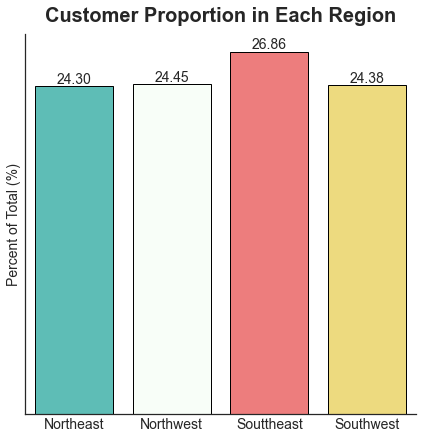

In [115]:
with plt.style.context(seaborn):
    fig, ax = plt.subplots(figsize=(7, 7))
    kwargs = {'edgecolor':'black', 'linewidth':1}

    idx = ['Northeast', 'Northwest', 'Souttheast', 'Southwest']

    sns.barplot(
        ax=ax, 
        data=charges_region, 
        x="region", 
        y="probability", 
        palette=region_pal,
        **kwargs
        )
    ax.set_title('Customer Proportion in Each Region')
    ax.set_ylabel('Percent of Total (%)')
    ax.set(xlabel=None)
    ax.set_xticklabels(idx)
    ax.xaxis.set_tick_params(labelsize=14)
    ax.yaxis.set_major_locator(plt.NullLocator()) # Remove Y-Axis Ticks
    
    ax.bar_label(ax.containers[0], fontsize=14, fmt='%.2f')

    plt.show();

Distribution relatively the same, with only Southeast having 2% percent more than other regions. This is not significantly more than other regions.

#### 2.2.2 Distribution of Smokers and Non Smokers in each Region

In [47]:
yn_smoker_region = pd.DataFrame(
    insurance_data.groupby(['region', 'smoker'])
    .count()['charges'])

yn_smoker_region['percentage (%)'] = ((yn_smoker_region['charges']*100)/yn_smoker_region['charges'].sum())

yn_smoker_region

charges  percentage (%)
region    smoker                         
northeast no          256       19.262603
          yes          67        5.041384
northwest no          267       20.090293
          yes          58        4.364184
southeast no          268       20.165538
          yes          89        6.696764
southwest no          267       20.090293
          yes          57        4.288939

In [48]:
# prepare data for plotting
region_percent_list = yn_smoker_region['percentage (%)'].to_list()
no_smoker_region_list = region_percent_list[::2]
smoker_region_list = region_percent_list[1::2]
region_labels = ['Northeast', 'Northwest', 'Southeast', 'Southwest']

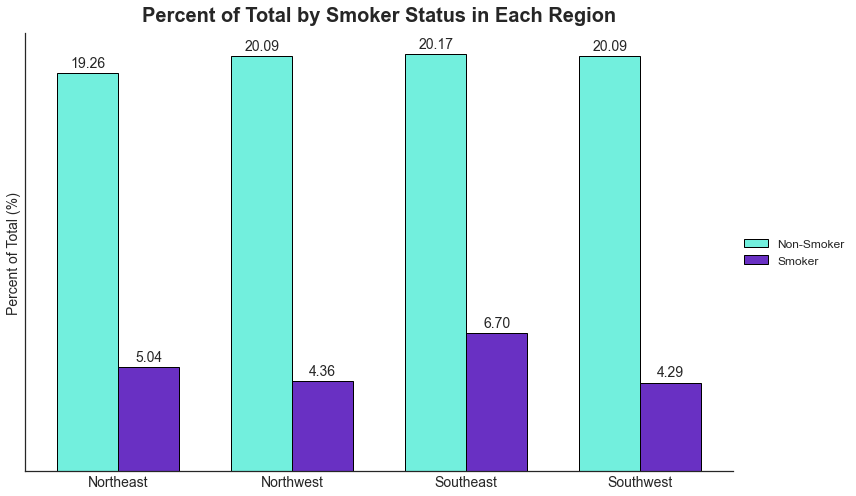

In [49]:
with plt.style.context(seaborn):
    x = np.arange(len(region_labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots(figsize=(12, 7))
    rects1 = ax.bar(
        x - width/2, 
        no_smoker_region_list, 
        width, 
        label='Non-Smoker',
        color=nosmoker_cat,
        edgecolor='black')
    rects2 = ax.bar(
        x + width/2, 
        smoker_region_list, 
        width, 
        label='Smoker',
        color=smoker_cat,
        edgecolor='black')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Percent of Total (%)')
    ax.set_title('Percent of Total by Smoker Status in Each Region', fontsize=20)
    ax.set_xticks(x, region_labels)
    ax.yaxis.set_major_locator(plt.NullLocator()) 
    ax.xaxis.set_tick_params(labelsize=14)

    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), edgecolor='black', fontsize='large')
    
    ax.bar_label(rects1, padding=3, fontsize=14, fmt='%.2f')
    ax.bar_label(rects2, padding=3, fontsize=14, fmt='%.2f')

    fig.tight_layout()

    plt.show()


Southeast have the most customes and also have the most Smokers.

#### 2.2.3 Proportion of Sex in Each Region

In [50]:
count_sex_region = pd.DataFrame(
    insurance_data.groupby(['region', 'sex'])
    .count()['charges'])

count_sex_region['percentage (%)'] = ((count_sex_region['charges']*100)/count_sex_region['charges'].sum())
count_sex_region

charges  percentage (%)
region    sex                            
northeast female      160       12.039127
          male        163       12.264861
northwest female      164       12.340105
          male        161       12.114372
southeast female      174       13.092551
          male        183       13.769752
southwest female      161       12.114372
          male        163       12.264861

In [51]:
# prepare data for plotting
sex_region = count_sex_region['percentage (%)'].to_list()
female_sex_list = sex_region[::2]
male_sex_list = sex_region[1::2]

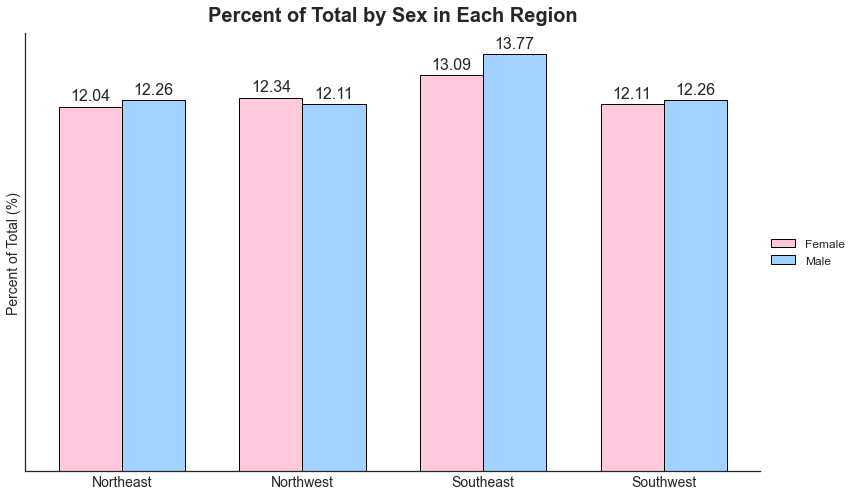

In [52]:
with plt.style.context(seaborn):
    x = np.arange(len(region_labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots(figsize=(12, 7))
    rects1 = ax.bar(
        x - width/2, 
        female_sex_list, 
        width, 
        label='Female',
        color=female_cat,
        edgecolor='black')
    rects2 = ax.bar(
        x + width/2, 
        male_sex_list, 
        width, 
        label='Male',
        color=male_cat,
        edgecolor='black')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Percent of Total (%)')
    ax.set_title('Percent of Total by Sex in Each Region', fontsize=20)
    ax.set_xticks(x, region_labels)
    ax.yaxis.set_major_locator(plt.NullLocator()) 
    ax.xaxis.set_tick_params(labelsize=14)

    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), edgecolor='black', fontsize='large')
    
    ax.bar_label(rects1, padding=3, fontsize=16, fmt='%.2f')
    ax.bar_label(rects2, padding=3, fontsize=16, fmt='%.2f')

    fig.tight_layout()

    plt.show()

Proportion of sex does not differ by the region. Southeast only have around 1% than the other regions. This is not significant.  

<hr>

## 2.3 BMI Status

#### 2.3.1 Proportion of BMI Status

In [53]:
# get charges by region
count_bmi_status = (insurance_data.groupby(
    ['bmi_status']
    )['charges']
    ).count()\
        .reset_index()

# get probability for each region charges
count_bmi_status['probability'] = (count_bmi_status['charges']/count_bmi_status['charges'].sum())*100

count_bmi_status = count_bmi_status.sort_values(by='probability', ascending=False)
count_bmi_status

,bmi_status,charges,probability
1,obesity,696,52.449133
2,overweight,386,29.088169
0,healthy weight,225,16.955539
3,underweight,20,1.507159


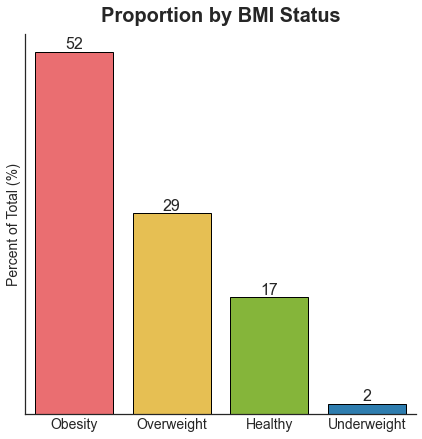

In [54]:
with plt.style.context(seaborn):
    fig, ax = plt.subplots(figsize=(7, 7))
    kwargs = {'edgecolor':'black', 'linewidth':1}

    idx = ['Obesity', 'Overweight', 'Healthy', 'Underweight']

    sns.barplot(
        ax=ax, 
        data=count_bmi_status, 
        x="bmi_status", 
        y="probability", 
        palette=bmi_pal,
        **kwargs
        )
    ax.set_title('Proportion by BMI Status')
    ax.set_ylabel('Percent of Total (%)')
    ax.set(xlabel=None)
    ax.set_xticklabels(idx)
    ax.xaxis.set_tick_params(labelsize=14)
    ax.yaxis.set_major_locator(plt.NullLocator()) # Remove Y-Axis Ticks
    
    ax.bar_label(ax.containers[0], fontsize=16, fmt='%.0f')

    plt.show();

Most customers are way over the BMI threshold (25) with the total of **81%**!<br>
Obese are the most (**52%**) and followed by overweight (29%) and healthy weight (17%).<br>
<br>
According to the [NHS](https://www.nhs.uk/conditions/obesity/), BMI is not used to diagnose obesity because people who are very muscular can have a high BMI without much fat.
<br>
But for most people, BMI is a useful indication of whether they're a healthy weight.
<br>
A better measure of excess fat is waist size, which can be used as an additional measure in people who are overweight (with a BMI of 25 to 29.9) or moderately obese (with a BMI of 30 to 34.9).

#### 2.3.2 Proportion of BMI Status in Each Region

In [55]:
# get charges by region
bmi_status_region = (insurance_data.groupby(
    ['region', 'bmi_status']
    )['charges']
    ).count()\
        .reset_index()

# get probability for each region charges
bmi_status_region['probability'] = (bmi_status_region['charges']/bmi_status_region['charges'].sum())*100


# add southeast underweight (it has 0)
southeast_underweight = {'region': 'southeast', 'bmi_status': 'underweight', 'charges': 0, 'probability': 0}
bmi_status_region = bmi_status_region.append(southeast_underweight, ignore_index=True)
#sort_values
bmi_status_region = bmi_status_region.sort_values(by=['region', 'bmi_status'])
bmi_status_region

C:\Users\ASUS\AppData\Local\Temp\ipykernel_8884\4087914838.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bmi_status_region = bmi_status_region.append(southeast_underweight, ignore_index=True)


,region,bmi_status,charges,probability
0,northeast,healthy weight,73,5.501130
1,northeast,obesity,142,10.700829
2,northeast,overweight,98,7.385079
3,northeast,underweight,10,0.753580
4,northwest,healthy weight,63,4.747551
5,northwest,obesity,148,11.152977
6,northwest,overweight,107,8.063301
7,northwest,underweight,7,0.527506
8,southeast,healthy weight,41,3.089676
9,southeast,obesity,236,17.784476


In [56]:
# prepare data for plotting
bmi_region = bmi_status_region['probability'].to_list()
hw_region = bmi_region[::4]
o_region = bmi_region[1::4]
ov_region = bmi_region[2::4]
u_region = bmi_region[3::4]

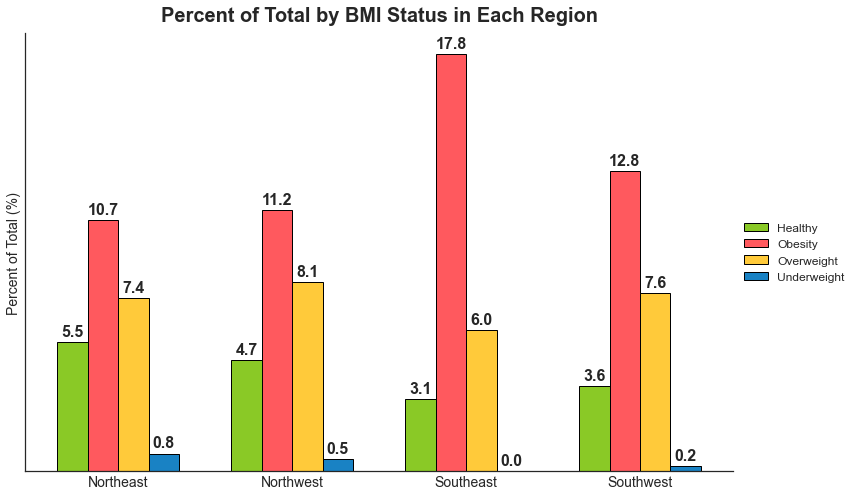

In [57]:
with plt.style.context(seaborn):
    x = np.arange(len(region_labels))  # the label locations
    width = 0.175  # the width of the bars

    fig, ax = plt.subplots(figsize=(12, 7))
    rects1 = ax.bar(
        x - 1.5*width, 
        hw_region, 
        width, 
        label='Healthy',
        color=healthy_weight_cat,
        edgecolor='black')
    rects2 = ax.bar(
        x - width/2, 
        o_region, 
        width, 
        label='Obesity',
        color=obesity_cat,
        edgecolor='black')
    rects3 = ax.bar(
        x + width/2, 
        ov_region, 
        width, 
        label='Overweight',
        color=overweight_cat,
        edgecolor='black')
    rects4 = ax.bar(
        x + 1.5*width, 
        u_region, 
        width, 
        label='Underweight',
        color=underweight_cat,
        edgecolor='black')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Percent of Total (%)')
    ax.set_title('Percent of Total by BMI Status in Each Region', fontsize=20)
    ax.set_xticks(x, region_labels)
    ax.yaxis.set_major_locator(plt.NullLocator()) 
    ax.xaxis.set_tick_params(labelsize=14)

    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), edgecolor='black', fontsize='large')
    
    ax.bar_label(rects1, padding=3, fontsize=16, fmt='%.1f', fontweight='bold')
    ax.bar_label(rects2, padding=3, fontsize=16, fmt='%.1f', fontweight='bold')
    ax.bar_label(rects3, padding=3, fontsize=16, fmt='%.1f', fontweight='bold')
    ax.bar_label(rects4, padding=3, fontsize=16, fmt='%.1f', fontweight='bold')

    fig.tight_layout()

    plt.show()

BMI > 25:
1. Northeast: 18.3%
2. Nortwest: 19.3%
3. Southeast: 23.8%
4. Southwest: 20.4%

Southeast have the most people with BMI over 25.

<hr style="color: #f00; height: 1px;">
<hr style="color: #f00; height: 1px; margin-top: 1px;">

## 3. Continuous Variable Analysis

### 3.1 Charges

#### 3.1.1 Distribution of Charge

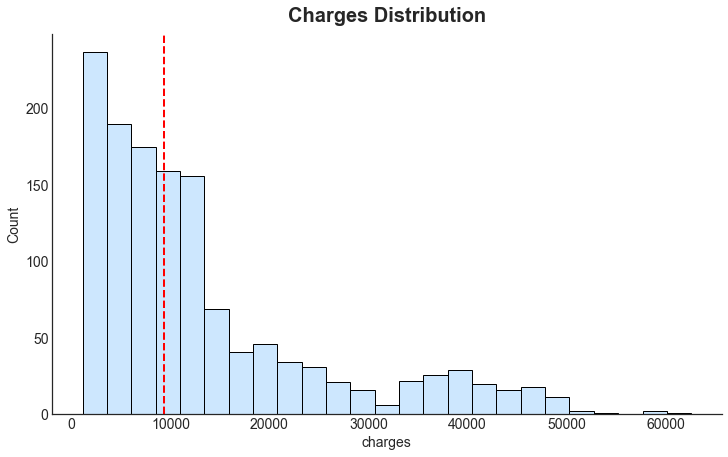

In [58]:
with plt.style.context(seaborn):
    fig, ax = plt.subplots(figsize=(12, 7))
    sns.histplot(
        ax=ax,
        data=insurance_data,
        x='charges',
        edgecolor='black',
        bins=25,
        color=distribution_blue)

    ax.xaxis.set_tick_params(labelsize=14)
    ax.yaxis.set_tick_params(labelsize=14)

    ax.axvline(insurance_data['charges'].median(), linestyle='--', c='red', linewidth=2)
    
    ax.set_title('Charges Distribution')
    plt.show();

Charges distribution is heavily skewed. Similar to the distribution of housing price. Usually this is because of loads of outliers. But there's just so many of it to ignore. 

#### 3.1.2 Charges by Sex

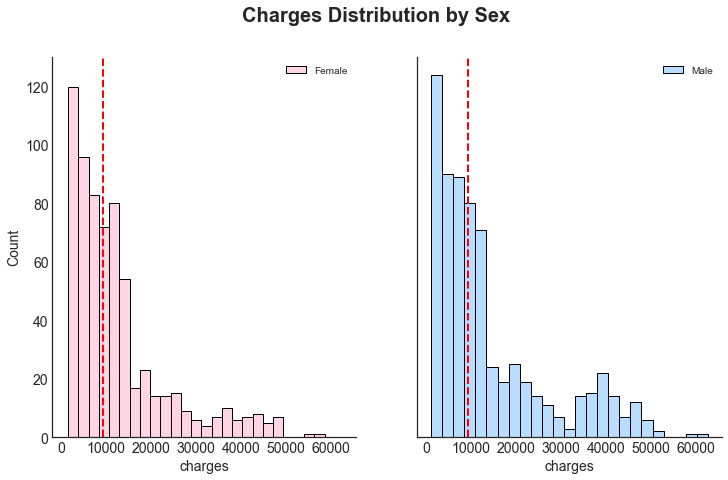

In [59]:
with plt.style.context(seaborn):
    rcParams['axes.titleweight'] = 'normal'
    rcParams['axes.titlesize'] = 14

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 7), sharey=True, sharex=True)
    sns.histplot(
        ax=ax2,
        data=male1,
        x='charges',
        edgecolor='black',
        bins=25,
        color=male_cat,
        label='Male')

    sns.histplot(
        ax=ax1,
        data=female1,
        x='charges',
        edgecolor='black',
        bins=25,
        color=female_cat,
        label='Female')

    plt.suptitle('Charges Distribution by Sex')

    ax2.xaxis.set_tick_params(labelsize=14)
    ax2.yaxis.set_tick_params(labelsize=14)
    ax2.legend()
    ax2.axvline(male1['charges'].median(), linestyle='--', c='red', linewidth=2)

    ax1.xaxis.set_tick_params(labelsize=14)
    ax1.yaxis.set_tick_params(labelsize=14)
    ax1.legend()
    ax1.axvline(female1['charges'].median(), linestyle='--', c='red', linewidth=2)

    plt.show();

Charge does not differ by the sex.

#### 3.1.3 Charges by BMI

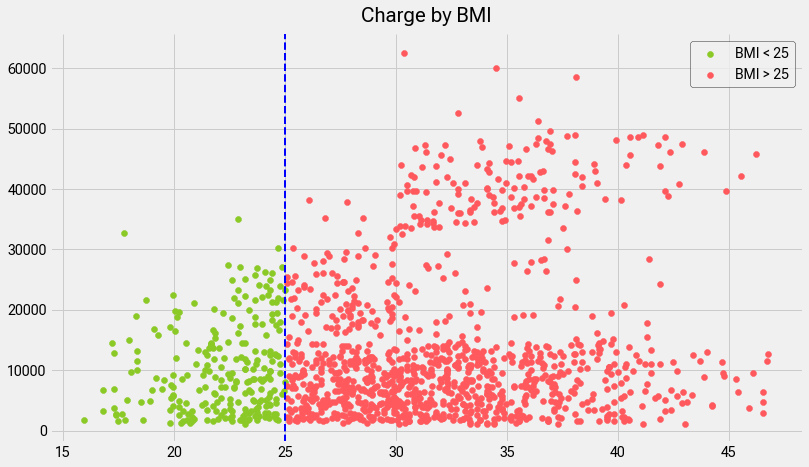

In [60]:
bmi_l25 = insurance_data[insurance_data['bmi'] < 25]
bmi_m25 = insurance_data[insurance_data['bmi'] > 25]

with plt.style.context(mpl): 
    fig, ax = plt.subplots(figsize=(12, 7))

    ax.scatter(
        bmi_l25['bmi'], 
        bmi_l25['charges'], 
        c=bmiL25_cat, 
        label='BMI < 25')
    ax.scatter(
        bmi_m25['bmi'], 
        bmi_m25['charges'], 
        c=bmiM25_cat, 
        label='BMI > 25')

    ax.xaxis.set_tick_params(labelsize=14)
    ax.yaxis.set_tick_params(labelsize=14)

    ax.axvline(x = 25, color = 'blue', linestyle='--', linewidth=2)
    ax.set_title('Charge by BMI')
    ax.legend(edgecolor='black', fontsize=14)

    plt.show();

Some of those with BMI over 25 or 30 clearly pay more charges. But still, most of the charges still on the lower side. This indicates BMI is not a great variable to rely on determining charges.

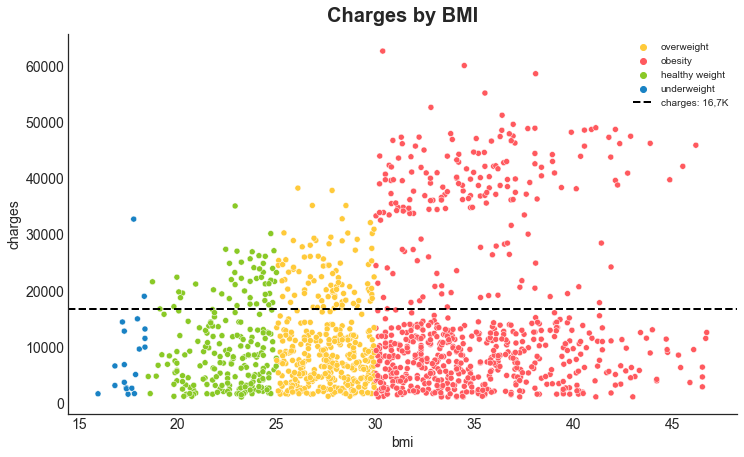

In [61]:
with plt.style.context(seaborn): 
    fig, ax = plt.subplots(figsize=(12, 7))

    sns.scatterplot(
        data=insurance_data, 
        x='bmi', 
        y='charges',
        hue='bmi_status',
        palette=bmi_pal)
        
    ax.xaxis.set_tick_params(labelsize=14)
    ax.yaxis.set_tick_params(labelsize=14)
    ax.set_title('Charges by BMI')
    ax.axhline(16700, linewidth=2, linestyle='--', color='black', label='charges: 16,7K')
    ax.legend()
    
    plt.show();

Most of the charges of those with BMI > 25 or 30 concentrated around <16,7K.

#### 3.1.4 Distribution of Charges in Each Region by Age

In [62]:
southeast_charges = insurance_data.loc[insurance_data['region'] == 'southeast']
southwest_charges = insurance_data.loc[insurance_data['region'] == 'southwest']
northeast_charges = insurance_data.loc[insurance_data['region'] == 'northeast']
northwest_charges = insurance_data.loc[insurance_data['region'] == 'northwest']

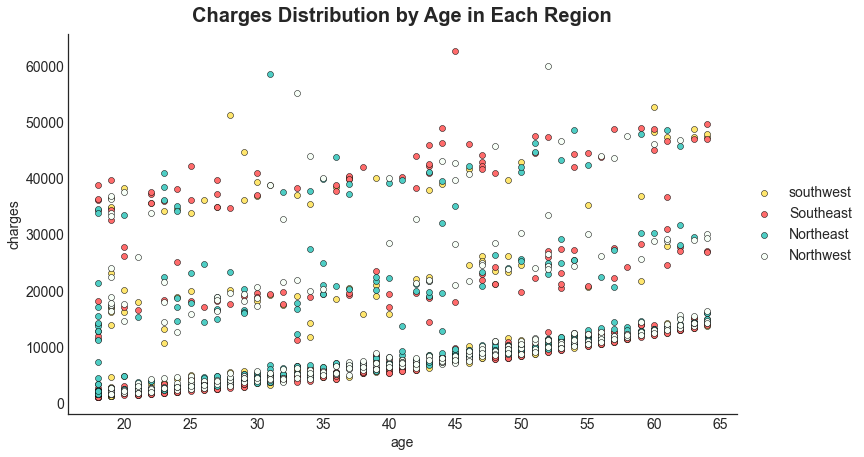

In [63]:
with plt.style.context(seaborn):
    fig, ax = plt.subplots(figsize=(12, 7))

    sns.scatterplot(
        ax=ax,
        x=southwest_charges['age'], 
        y=southwest_charges['charges'],
        color=region_pal['southwest'],
        edgecolor="black",
        label='southwest')
    sns.scatterplot(
        ax=ax,
        x=southeast_charges['age'], 
        y=southeast_charges['charges'],
        color=region_pal['southeast'],
        edgecolor="black",
        label='Southeast')
    sns.scatterplot(
        ax=ax,
        x=northeast_charges['age'], 
        y=northeast_charges['charges'],
        color=region_pal['northeast'],
        edgecolor="black",
        label='Northeast')
    sns.scatterplot(
        ax=ax,
        x=northwest_charges['age'], 
        y=northwest_charges['charges'],
        color=region_pal['northwest'],
        edgecolor="black",
        label='Northwest')
        
    ax.set_title('Charges Distribution by Age in Each Region')
    ax.xaxis.set_tick_params(labelsize=14)
    ax.yaxis.set_tick_params(labelsize=14)

    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), edgecolor='black', fontsize=14)

    tick_spacing = 5
    ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    
    plt.show();

I'm afraid it's hard to infer an insight from this, as it's too random.

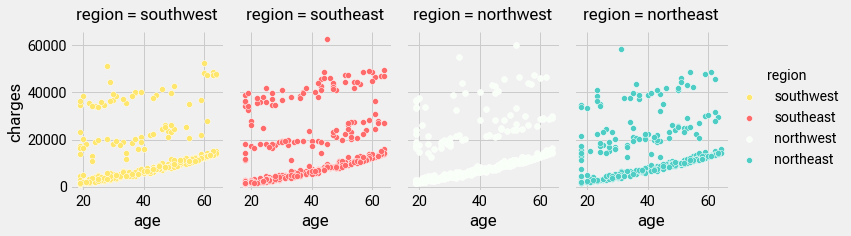

In [64]:
with plt.style.context(mpl):
    grid = sns.FacetGrid(
        insurance_data, 
        col='region', 
        hue='region', 
        col_wrap=4, 
        height=3.5, 
        aspect=.75, 
        palette=region_pal)
    grid.map(sns.scatterplot, 'age', 'charges')
    
    grid.add_legend()

    plt.show();

Charge does not differ significantly by the regions.

<hr>

## Table of Chances

### So, what's actually considered **paying higher** than most people?
Let's assume those with charges who got into Q3 are considered paying more than most people

In [65]:
insurance_data['charges'].quantile(0.75)

16586.49771

Let's take ***16,7K*** as a threshold.<br> 
From here, we can start quantifying the chances of getting higher (>16,7K) or lower charges (<16,7K) on a given information.

### Weighting Chances

In [66]:
charge16_7 = (insurance_data['charges'] > 16_700)
bmi_m25 = (insurance_data['bmi'] > 25)
bmi_l25 = (insurance_data['bmi'] < 25)
underweight = (insurance_data['bmi_status'] == 'underweight')
healthy_weight = (insurance_data['bmi_status'] == 'healthy weight')
overweight = (insurance_data['bmi_status'] == 'overweight')
obesity = (insurance_data['bmi_status'] == 'obesity')

In [67]:
s_g_hc = conditional(charge16_7, given=prob_smoker)
ns_g_hc = conditional(charge16_7, given=prob_no_smoker)
under_g_hc = conditional(charge16_7, given=underweight)
healthy_g_hc = conditional(charge16_7, given=healthy_weight)
overweight_g_hc = conditional(charge16_7, given=overweight)
obese_g_hc = conditional(charge16_7, given=obesity)
under_s_hc = conditional(charge16_7, given=underweight&prob_smoker)
healthy_s_hc = conditional(charge16_7, given=healthy_weight&prob_smoker)
over_s_hc = conditional(charge16_7, given=overweight&prob_smoker)
obese_s_hc = conditional(charge16_7, given=obesity&prob_smoker)
under_ns_hc = conditional(charge16_7, given=underweight&prob_no_smoker)
healthy_ns_hc = conditional(charge16_7, given=healthy_weight&prob_no_smoker)
over_ns_hc = conditional(charge16_7, given=overweight&prob_no_smoker)
obese_ns_hc = conditional(charge16_7, given=obesity&prob_no_smoker)
bmiM25_ch = conditional(charge16_7, given=bmi_m25)
bmiL25_ch = conditional(charge16_7, given=bmi_l25)

chance_array = [s_g_hc, ns_g_hc, under_g_hc, healthy_g_hc, overweight_g_hc, obese_g_hc, under_s_hc, healthy_s_hc, over_s_hc, obese_s_hc, under_ns_hc, healthy_ns_hc, over_ns_hc, obese_ns_hc, bmiM25_ch, bmiL25_ch]

high_col = [] # col 1
low_col= [] # col 2
for i in chance_array:
    high_col.append(round(i, 3)*100)
for i in high_col:
    low_col.append(round(100-i, 3))

chances = pd.DataFrame({
    'Higher Charge Chance (%)': high_col,
    'Lower Charge Chance (%)': low_col,
    }, index=['Smoker (1)', 'Non-Smoker (2)', 'Underweight (3)', 'Healthy Weight (4)', 'Overweight (5)', 'Obesity (6)', 'Underweight & Smoker (7)', 'Healthy Weight & Smoker (8)', 'Overweight & Smoker (9)', 'Obesity & Smoker (10)', 'Underweight & Non-Smoker (11)', 'Healthy Weight & Non-Smoker (12)', 'Overweight & Non-Smoker (13)', 'Obesity & Non-Smoker (14)', 'BMI > 25 (15)', 'BMI < 25 (16)'])

chances_df = chances.round(decimals=3)
chances_df.index.name='Given Condition'

chances_map = chances_df\
    .style\
        .background_gradient(cmap=minMax)\
        .set_properties(**{'font-size': '20px'})

chances_map

,Higher Charge Chance (%),Lower Charge Chance (%)
Given Condition,,
Smoker (1),92.600000,7.400000
Non-Smoker (2),7.600000,92.400000
Underweight (3),10.000000,90.000000
Healthy Weight (4),21.800000,78.200000
Overweight (5),23.800000,76.200000
Obesity (6),26.900000,73.100000
Underweight & Smoker (7),40.000000,60.000000
Healthy Weight & Smoker (8),74.000000,26.000000
Overweight & Smoker (9),94.600000,5.400000


So, what can we infer from the table?<br>
<br>
For all 4 categories of BMI, there are higher chances of getting lower charges. But as soon as we include smoker status, the probability of getting higher charges is increasing significantly.<br> 
So, despite getting high BMI than what's considered healthy weight, charges are actually in the lower level.<br>
<br>
Let's take a look at the other conditions:

#### If someone is a Smoker, what's the chance of getting higher charge?

In [68]:
chance(chances, 1, 'high')

92.60000000000001

So, if we know that a customer is a smoker, the chances of getting higher charges is around 92.6%. 

#### If someone is overweight and a smoker, what's the chance of getting higher charge?

In [69]:
chance(chances, 9, 'high')

94.6

If we know the customer is a smoker and is overweight, the chance of getting higher charge is around 94%

#### But if someone is in healthy range, but a smoker, what's the chance of getting higher charge?

In [70]:
chance(chances, 8, 'high')

74.0

If the customer is healthy, but a smoker, the chance of getting higher charge is around 71%. Still a high chance!

Conclusion:<br>
The table of chances for given condition can provide valuable information on assessing possible outcomes or actions. It helps to revise or improve the prior assumptions on how risk factors can affect health charges. The value of the chances does not necessarily mean it will happen 74% of the time, but rather as a addition to assess risks. 

<hr style="color: #f00; height: 1px;">
<hr style="color: #f00; height: 1px; margin-top: 1px;">

## 4. Variable Correlation Analysis

In [71]:
insurance_data.corr().style.background_gradient(cmap=corrMatrix)

,age,bmi,children,charges
age,1.000000,0.114686,0.043041,0.302022
bmi,0.114686,1.000000,0.017355,0.193196
children,0.043041,0.017355,1.000000,0.069739
charges,0.302022,0.193196,0.069739,1.000000


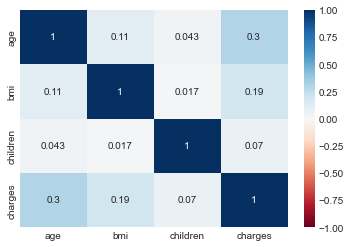

In [72]:
with plt.style.context(seaborn):    
    sns.heatmap(
        insurance_data.corr(), 
        cmap=corrMatrix, 
        vmin=-1, 
        vmax=1, 
        annot=True) 
        
    plt.show();

We have many categorical variables. It might just affect the overal correlation matrix here. So, we need to explore the correlation for each categorical variable. Expand correlation matrix with dummy

### 4.1 Using Dummy

In [73]:
dummy_df = pd.get_dummies(data=insurance_data, columns=['sex', 'smoker', 'region', 'children', 'bmi_status'])
dummy_df = get_bmi_more_less(dummy_df)

dummy_df.corr().style.background_gradient(cmap=corrMatrix)

,age,bmi,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,children_0,children_1,children_2,children_3,children_4,children_5,bmi_status_healthy weight,bmi_status_obesity,bmi_status_overweight,bmi_status_underweight,bmi_m25,bmi_l25
age,1.000000,0.114686,0.302022,0.019143,-0.019143,0.024505,-0.024505,0.001766,-0.000283,-0.011581,0.010474,-0.048540,0.011749,0.007472,0.061588,-0.002011,-0.029979,-0.079425,0.087125,-0.012831,-0.060331,0.091654,-0.095755
bmi,0.114686,1.000000,0.193196,-0.039958,0.039958,0.002871,-0.002871,-0.136193,-0.128598,0.255863,0.000651,-0.012986,-0.014355,0.023607,0.009091,0.019978,-0.018461,-0.604288,0.808468,-0.317289,-0.270937,0.671002,-0.669482
charges,0.302022,0.193196,1.000000,-0.063394,0.063394,-0.785912,0.785912,0.009750,-0.037704,0.071597,-0.045906,-0.066222,-0.024627,0.068330,0.065401,0.007370,-0.043247,-0.105514,0.198241,-0.118690,-0.044939,0.116653,-0.116154
sex_female,0.019143,-0.039958,-0.063394,1.000000,-1.000000,0.079854,-0.079854,-0.000573,0.009961,-0.010263,0.001195,0.014784,-0.002378,-0.003984,-0.003964,-0.015470,-0.012050,0.021795,-0.042546,0.025186,0.025745,-0.032971,0.029162
sex_male,-0.019143,0.039958,0.063394,-1.000000,1.000000,-0.079854,0.079854,0.000573,-0.009961,0.010263,-0.001195,-0.014784,0.002378,0.003984,0.003964,0.015470,0.012050,-0.021795,0.042546,-0.025186,-0.025745,0.032971,-0.029162
smoker_no,0.024505,0.002871,-0.785912,0.079854,-0.079854,1.000000,-1.000000,-0.004947,0.035940,-0.068270,0.039440,0.009183,0.022941,-0.026637,-0.040420,0.028837,0.043146,-0.020515,0.003452,0.019377,-0.014139,0.022246,-0.024280
smoker_yes,-0.024505,-0.002871,0.785912,-0.079854,0.079854,-1.000000,1.000000,0.004947,-0.035940,0.068270,-0.039440,-0.009183,-0.022941,0.026637,0.040420,-0.028837,-0.043146,0.020515,-0.003452,-0.019377,0.014139,-0.022246,0.024280
region_northeast,0.001766,-0.136193,0.009750,-0.000573,0.000573,-0.004947,0.004947,1.000000,-0.322387,-0.343402,-0.321730,0.029145,-0.003171,-0.035887,0.004580,0.011931,-0.020864,0.085680,-0.095385,0.016178,0.074052,-0.103588,0.106113
region_northwest,-0.000283,-0.128598,-0.037704,0.009961,-0.009961,0.035940,-0.035940,-0.322387,1.000000,-0.344807,-0.323046,-0.027001,-0.017419,0.035606,0.041256,-0.001464,-0.051521,0.037239,-0.077826,0.048611,0.030327,-0.043193,0.045537
region_southeast,-0.011581,0.255863,0.071597,-0.010263,0.010263,-0.068270,0.068270,-0.343402,-0.344807,1.000000,-0.344105,0.002113,0.020013,0.009155,-0.037731,-0.021437,0.017107,-0.088000,0.166681,-0.088582,-0.074911,0.110630,-0.108626


Smoker status is the only variable with high correlation value, with smoker having positive correlation whilst non-smokers having negative correlation compared to the charges

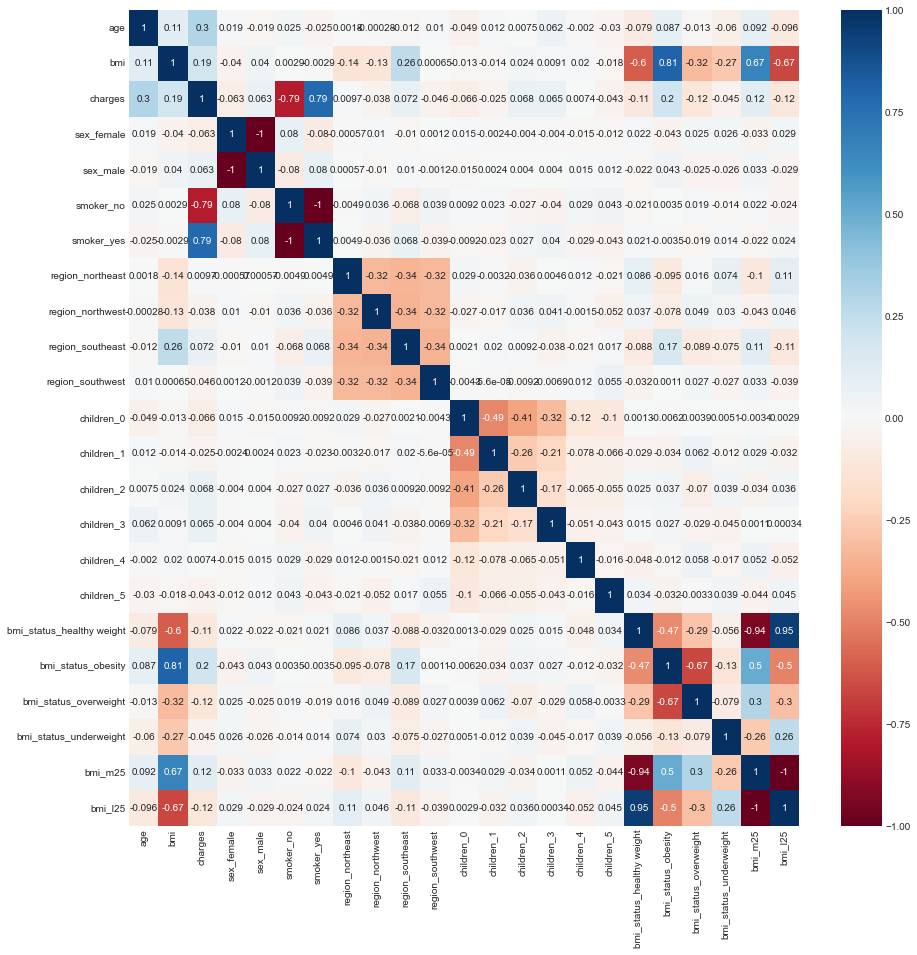

In [74]:
# plot correlation
with plt.style.context(seaborn):
    plt.subplots(figsize=(15, 15))
    sns.heatmap(
        dummy_df.corr(), 
        cmap=corrMatrix, 
        vmin=-1, 
        vmax=1, 
        annot=True) 
        
    plt.show();

In [75]:
get_corr_cols(dummy_df, 0.7)

{'smoker_no', 'smoker_yes'}

Given all conditions that we have, there's only 2 variables that exceeded the threshold as high correlated with charges (positive or negative), which are smoker status.

### 4.2 Smoker Correlation

In [76]:
smoker_dummy = pd.get_dummies(data=smoker, columns=['sex', 'region', 'children', 'bmi_status'])
smoker_dummy = get_bmi_more_less(smoker_dummy)

get_corr_cols(smoker_dummy, 0.7)

{'bmi', 'bmi_status_obesity'}

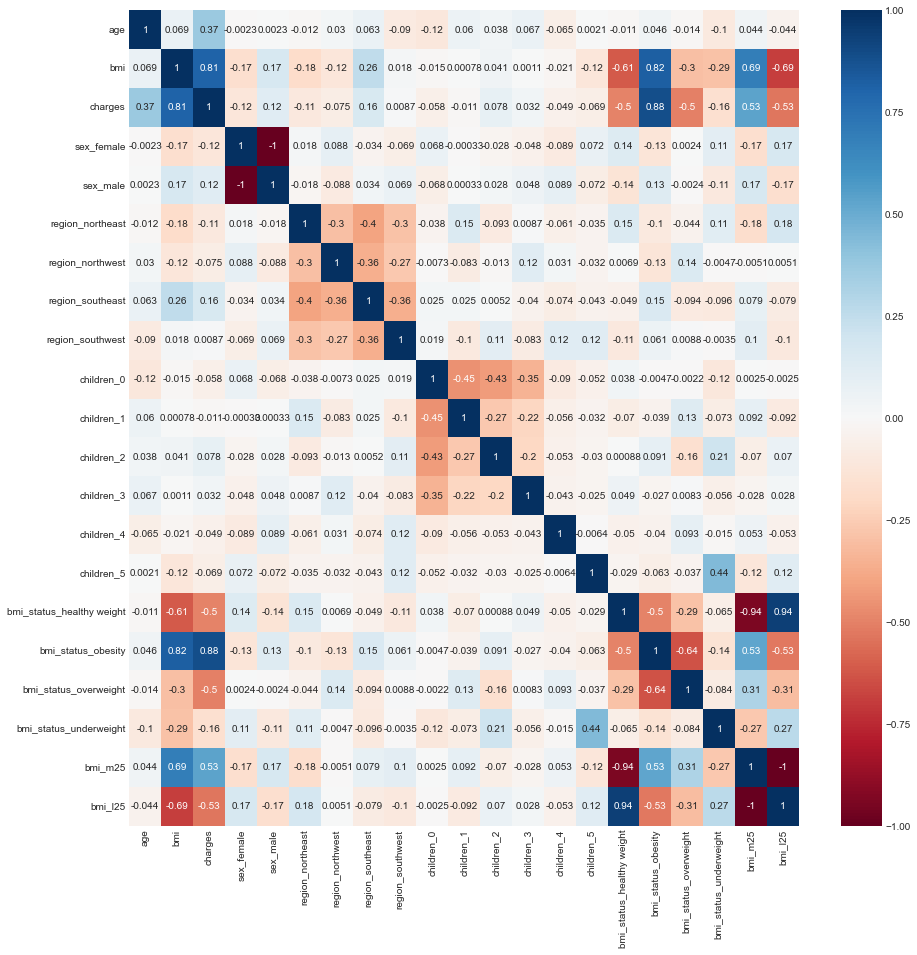

In [77]:
# plot correlation
with plt.style.context(seaborn):
    plt.subplots(figsize=(15, 15))
    sns.heatmap(
        smoker_dummy.corr(), 
        cmap=corrMatrix, 
        vmin=-1, 
        vmax=1, 
        annot=True) 
        
    plt.show();

BMI has a high correlation value with charges, along with smokers, especially when it comes to obesity (bmi > 30), with .81 and .88 correlation values respectively.

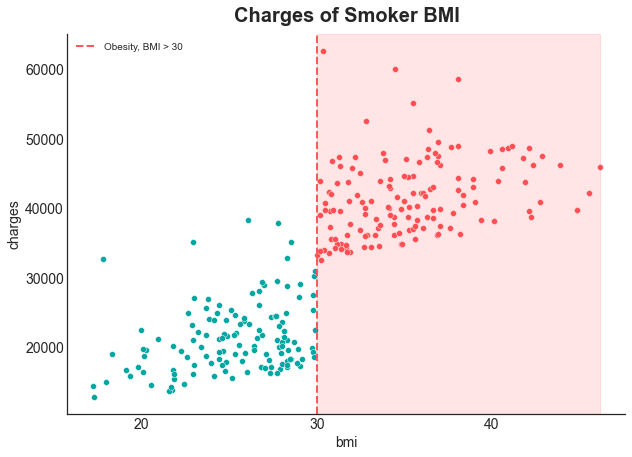

In [78]:
with plt.style.context(seaborn):
    f1 = smoker_dummy.loc[smoker_dummy['bmi'] < 30]
    f2 = smoker_dummy.loc[smoker_dummy['bmi'] > 30]

    fig, ax = plt.subplots(figsize=(10, 7))
    sns.scatterplot(ax=ax, data=f1, x='bmi', y='charges', color='#00a6a1')
    sns.scatterplot(ax=ax, data=f2, x='bmi', y='charges', color='#ff595e')

    ax.set_title('Charges of Smoker BMI')
    ax.xaxis.set_tick_params(labelsize=14)
    ax.yaxis.set_tick_params(labelsize=14)

    tick_spacing = 10
    ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

    ax.axvline(30, linestyle='--', linewidth=2, color='#ff595e', label='Obesity, BMI > 30')
    ax.axvspan(30, smoker_dummy.bmi.max(), alpha=0.1, color='red')

    ax.legend()

    plt.show();

For smokers, bmi > 30 (obesity) has a high correlation with charges (88%)

### 4.3 Non-Smoker Correlation

In [79]:
no_smoker_dummy = pd.get_dummies(data=no_smoker, columns=['sex', 'region', 'children', 'bmi_status'])
no_smoker_dummy = get_bmi_more_less(no_smoker_dummy)

get_corr_cols(no_smoker_dummy, 0.7)

set()

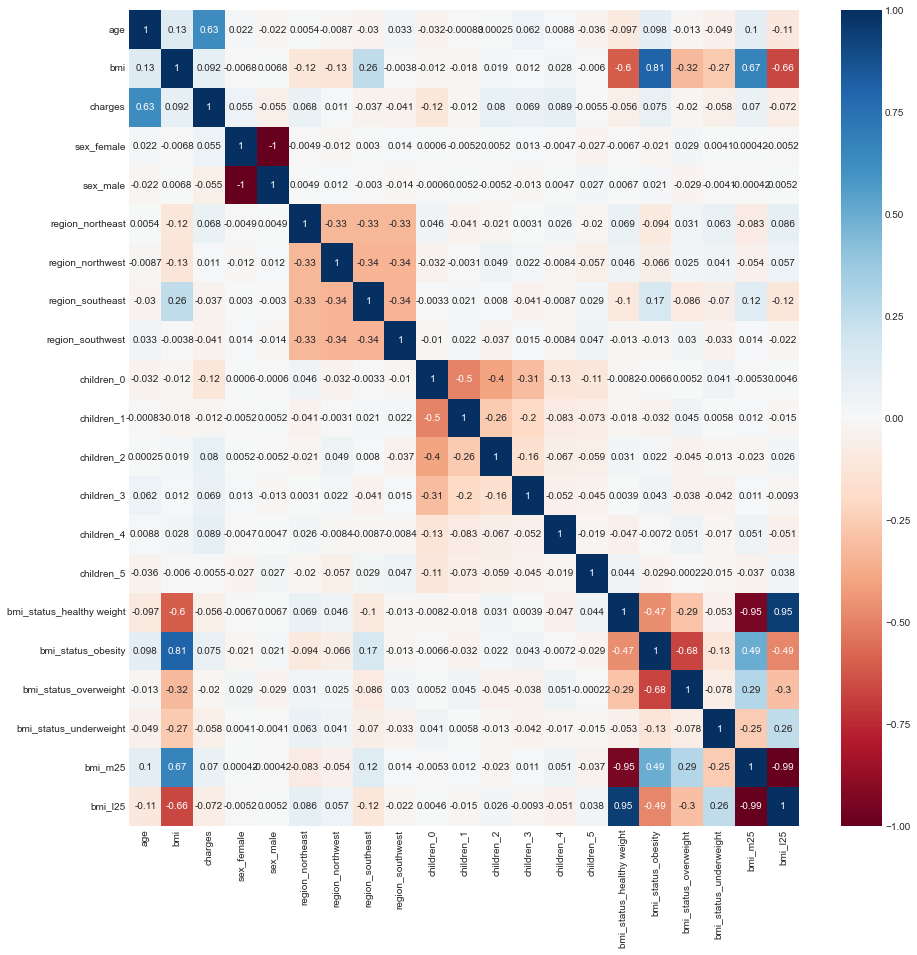

In [80]:
# plot correlation
with plt.style.context(seaborn):
    plt.subplots(figsize=(15, 15))
    sns.heatmap(
        no_smoker_dummy.corr(), 
        cmap=corrMatrix, 
        vmin=-1, 
        vmax=1, 
        annot=True) 
        
    plt.show();

Non-Smokers have zero variables with high correlation value. Age has .63 correlation value, so let's see it in scatter plot

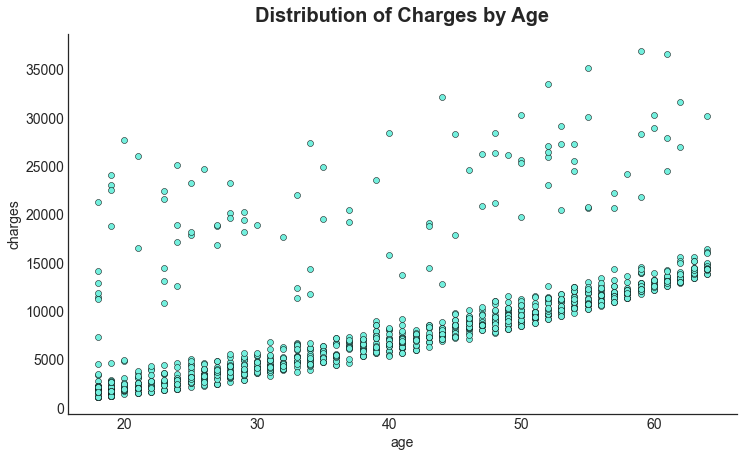

In [81]:
with plt.style.context(seaborn):
    fig, ax = plt.subplots(figsize=(12, 7))

    sns.scatterplot(
        ax=ax,
        data=no_smoker_dummy,
        x='age',
        y='charges',
        color=nosmoker_cat,
        edgecolor='black'
    )

    ax.xaxis.set_tick_params(labelsize=14)
    ax.yaxis.set_tick_params(labelsize=14)
    ax.set_title('Distribution of Charges by Age')

    plt.show();

Charges increases overtime as people get older.

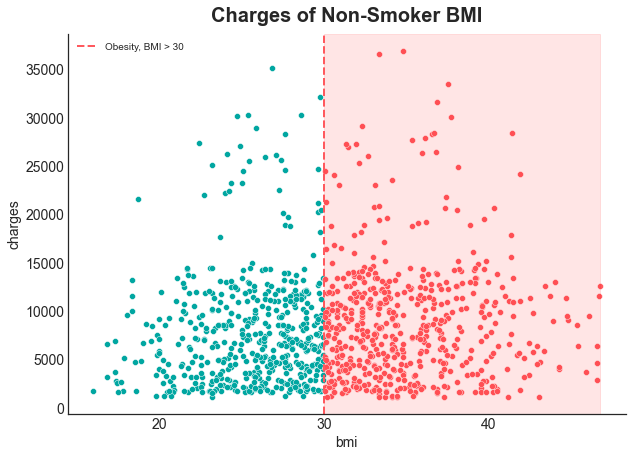

In [82]:
with plt.style.context(seaborn):
    f1 = no_smoker_dummy.loc[no_smoker_dummy['bmi'] < 30]
    f2 = no_smoker_dummy.loc[no_smoker_dummy['bmi'] > 30]

    fig, ax = plt.subplots(figsize=(10, 7))
    sns.scatterplot(ax=ax, data=f1, x='bmi', y='charges', color='#00a6a1')
    sns.scatterplot(ax=ax, data=f2, x='bmi', y='charges', color='#ff595e')

    ax.set_title('Charges of Non-Smoker BMI')
    ax.xaxis.set_tick_params(labelsize=14)
    ax.yaxis.set_tick_params(labelsize=14)

    tick_spacing = 10
    ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

    ax.axvline(30, linestyle='--', linewidth=2, color='#ff595e', label='Obesity, BMI > 30')
    ax.axvspan(30, no_smoker_dummy.bmi.max(), alpha=0.1, color='red')

    ax.legend()

    plt.show();

There's not much difference between those with BMI > 30 and those with BMI < 25 if they don't smoke

<hr style="color: #f00; height: 1px;">
<hr style="color: #f00; height: 1px; margin-top: 1px;">

## 5. Hypothesis Testing

### Hypothesis 1: Charges of smokers are higher compared to those who not

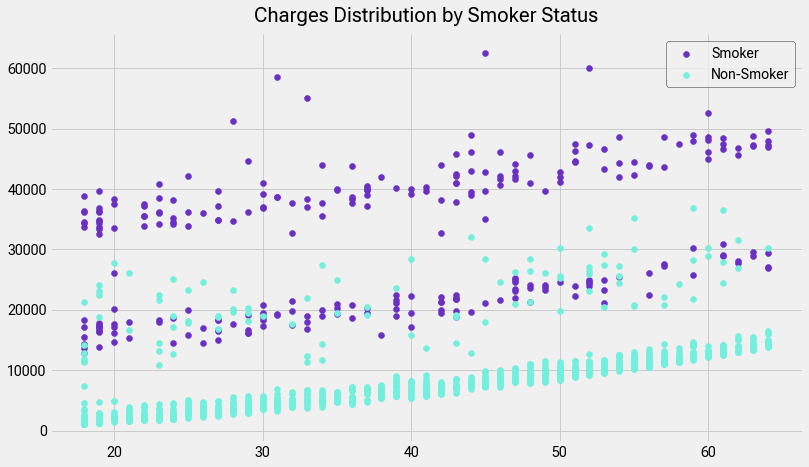

In [83]:
with plt.style.context(mpl): 
    fig, ax = plt.subplots(figsize=(12, 7))
    
    ax.scatter(
        smoker['age'], 
        smoker['charges'], 
        label='Smoker', 
        c=smoker_cat)
    ax.scatter(
        no_smoker['age'], 
        no_smoker['charges'], 
        label='Non-Smoker', 
        c=nosmoker_cat)
    
    ax.legend(edgecolor='black', fontsize=14)
    ax.set_title("Charges Distribution by Smoker Status")

    plt.show();

In [84]:
# T-test
Ho = "Charges of smoker and non-smoker are same"   
Ha = "Charges of smoker and non-smoker are not the same"

x = np.array(insurance_data[insurance_data.smoker == 'yes'].charges) 
y = np.array(insurance_data[insurance_data.smoker == 'no'].charges)

# independent t-test
t, p_value  = stats.ttest_ind(x,y, axis = 0)

if p_value < 0.05:
    print('Reject Null Hypothesis: claims by smokers charges are the same as non-smoker.\np-value: %.8f' % p_value)
else:
    print('Fail to Reject Null Hypothesis: claims by smokers charges are the same as non-smoker.\np-value: %.8f' % p_value)

Reject Null Hypothesis: claims by smokers charges are the same as non-smoker.
p-value: 0.00000000


Conclusion: Smokers pay higher charges compared to non-smokers

### Hypothesis 2: Charges of those with BMI > 25 are higher than those with BMI < 25

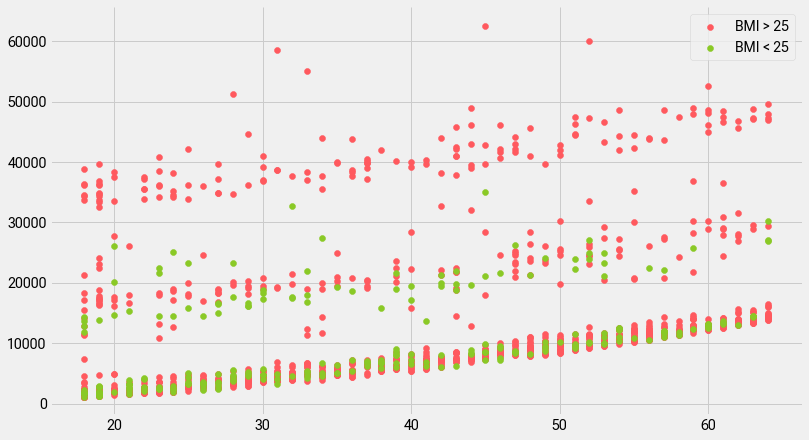

In [85]:
with plt.style.context(mpl):
    fig, ax = plt.subplots(figsize=(12, 7))
    hypo2_bmi_m25 = (insurance_data[bmi_m25])
    hypo2_bmi_l25 = (insurance_data[bmi_l25])

    ax.scatter(
        hypo2_bmi_m25['age'], 
        hypo2_bmi_m25['charges'], 
        label='BMI > 25', 
        c=bmiM25_cat)
    ax.scatter(
        hypo2_bmi_l25['age'], 
        hypo2_bmi_l25['charges'], 
        label='BMI < 25', 
        c=bmiL25_cat)
        
    ax.legend()

    plt.show();

In [86]:
Ho_2 = "Charges of those with BMI > 25 and BMI < 25 are the same"   
Ha_2 = "Charges of those with BMI > 25 and BMI < 25 are not the same"

x = np.array(dummy_df[dummy_df.bmi_m25 == 1].charges) 
y = np.array(dummy_df[dummy_df.bmi_l25 == 1].charges)

t, p_value  = stats.ttest_ind(x,y, axis = 0)

if p_value < 0.05:
    print('Reject Null Hypothesis: claims that those with BMI > 25 charges are the same as those with BMI < 25.\np-value: %.8f' % p_value)
else:
    print('Fail to Reject Null Hypothesis: claims that those with BMI > 25 charges are the same as those with BMI < 25.\np-value: %.8f' % p_value)

Reject Null Hypothesis: claims that those with BMI > 25 charges are the same as those with BMI < 25.
p-value: 0.00002151


Conclusion: Those with BMI > 25 pay higher than those with BMI < 25

### Hypothesis 3: Male and Female BMI's does not differ significantly

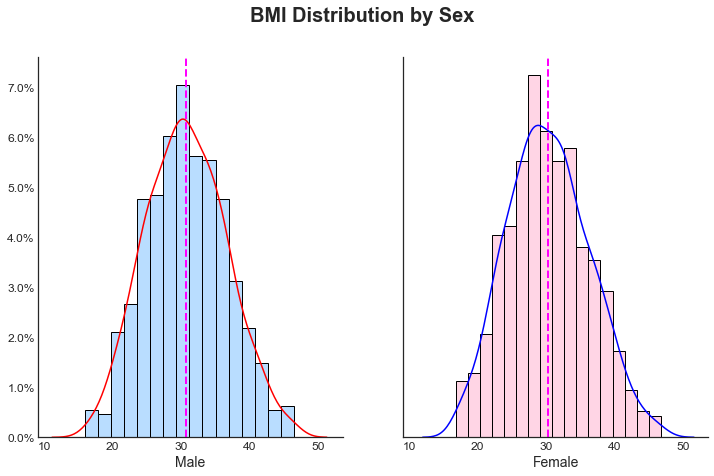

In [87]:
with plt.style.context(seaborn):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 7), sharex=True, sharey=True)
    sns.histplot(
        ax=ax1, 
        data=male1, 
        x='bmi',
        color=male_cat,
        stat='density',
        label='Male')
    sns.kdeplot(
        ax=ax1,
        data=male1,
        x='bmi',
        color='red')
    sns.histplot(
        ax=ax2, 
        data=female1, 
        x='bmi',
        color=female_cat,
        stat='density',
        label='Female')
    sns.kdeplot(
        ax=ax2,
        data=female1,
        x='bmi',
        color='blue')

    ax1.yaxis.set_major_formatter(ticker.PercentFormatter(1))
    ax2.yaxis.set_major_formatter(ticker.PercentFormatter(1))
    ax1.set_xlabel('Male')
    ax2.set_xlabel('Female')

    ax1.axvline(male1['bmi'].mean(), linestyle='--', linewidth=2, c='magenta')
    ax2.axvline(female1['bmi'].mean(), linestyle='--', linewidth=2, c='magenta')

    ax1.yaxis.set_tick_params(labelsize=12)
    ax1.xaxis.set_tick_params(labelsize=12)
    ax2.xaxis.set_tick_params(labelsize=12)
    ax1.set(ylabel=None)

    plt.suptitle('BMI Distribution by Sex')
    
    plt.show();

In [88]:
Ho_3 = "BMI of Male and Female does not differ significantly"   
Ha_3 = "BMI of Male and Female does differ significantly"

x = np.array(insurance_data[insurance_data.sex == 'male'].bmi) 
y = np.array(insurance_data[insurance_data.sex == 'female'].bmi)

t, p_value  = stats.ttest_ind(x, y, axis=0)

if p_value < 0.05:
    print('Reject Null Hypothesis: claims BMI of Male and Female does not differ significantly.\np-value: %.8f' % p_value)
else:
    print('Fail to Reject Null Hypothesis: claims BMI of Male and Female does not differ significantly.\np-value: %.8f' % p_value)

Fail to Reject Null Hypothesis: claims BMI of Male and Female does not differ significantly.
p-value: 0.14542176


Conclusion: BMI does not differ significantly between male and female

<hr style="color: #f00; height: 1px;">
<hr style="color: #f00; height: 1px; margin-top: 1px;">

## 6. Summary

After the analysis, we can say that:
1. Customer age is spread from 18 to 68 y.o., with age 18 and 19 dominating (68 customers). But we need to research on why elderly (>60 y.o.) do not signup to the insurance, as they need it the most. 
2. Smokers charges is significantly higher than Non-Smokers charges. This indicates that smoking heavily influences the health charges.
3. Around 81% of the customer are over the BMI threshold, though this not indicates the true obesity diagnosis because people with muscular can have a high BMI without much fat. But for most people, BMI is still useful for measing healthy weight. So, this is still worth noticing!
4. Higher BMI does not increase the chance of getting higher charges (>16,7K). Even if the customer has obesity, the charges does not increasing by much.
5. Combining smoking and overweight/obesity condition is a dangerous one. 90% of customers with these two conditions charged more than the other. This is a valuable information to improve risk assessment.
6. Charges is getting higher as people get older.

Key point:<br>
These variables are important to assess customers' charges and risks, sorted on higher to lower value of correlation: 
  1. Smokers
  2. BMI: Obesity
  3. Age: older  

<hr style="color: #f00; height: 1px;">
<hr style="color: #f00; height: 1px; margin-top: 1px;">